<a href="https://colab.research.google.com/github/SindhushaPalakurthy/capstone/blob/main/Capstone_Project_Reference_Notebook_Loan_Default_Prediction_Low_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - A major proportion of retail bank profit comes from interests in the form of homeloans.These loans are borrowed by regular income/high-earningcustomers.Banks are most fearful of defaulters,as bad loans(NPA) usually eat up a major chunk of their profits.Therefore,it is important for banks to be judicious while approving loans for their customer base.

### **The objective:**

  -To build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.


### **The key questions:**

- One important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.
-The model will be built from predictive modeling techniques,but the model created must be interpretable enough to provide a justification for any adverse behavior(rejections).
-The model can make wrong predictions in the following ways:

Predicting a customer will default but the customer doesn't default in reality (False Positive)
Predicting a customer will not default but the customer defaults in reality (False Negative)
Predicting that customers will not default but defaults in reality (False Negative) is more expensive/damaging as this will lead to a huge loss for the bank if customers do not pay the loan back to the bank. Therefore, banks would want to capture as many customers as possible who would not be able to repay the loan (defaulters).


### **The problem formulation**:

- The approval process for the loans is multifaceted.Through this process,the bank tries to check the credit worthiness of the applicant on the basis of a manual study of various aspects of the application.

The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.There have been attempts by many banks to automate this process by using heuristics.But with the advent of datascience and machinelearning,the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient.

A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted.To do this,they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credits coring.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hm=pd.read_csv("/content/drive/My Drive/hmeq.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
# Display first five rows
# Remove ___________ and complete the code

data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [ ]:
# Display last 5 rows
# Remove ___________ and complete the code
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape

(5960, 13)

**Insights dataset contains 5960 rows and 13 columns________**

### **Check the data types of the columns**

In [ ]:
# Check info of the data
# Remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights :data types are float,int,object    **

### **Check for missing values**

In [ ]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
data.isnull()
missing_count = data.isna().sum()
print(missing_count)

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [ ]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

missing_percentage = (missing_count / 5960) * 100
print(missing_percentage)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Insights DEBTINC has the highest % of missing values-21.2%, followed by DEROG-11.87%, DELINQ-9.7%**

In [ ]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [ ]:
data['DEBTINC'].fillna(data['DEBTINC'].median(), inplace=True)
data['DEROG'].fillna(data['DEROG'].median(), inplace=True)
data['DELINQ'].fillna(data['DELINQ'].median(), inplace=True)
data.isnull()
missing_count = data.isna().sum()
print(missing_count)

BAD          0
LOAN         0
MORTDUE    518
VALUE      112
REASON     252
JOB        279
YOJ        515
DEROG        0
DELINQ       0
CLAGE      308
NINQ       510
CLNO       222
DEBTINC      0
dtype: int64


In [ ]:
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

When the data is heavily skewed or contains outliers, using the mean for imputation may lead to biased estimates. In such cases, median imputation is often a more appropriate choice because it is robust to outliers and provides a better representation of the central tendency, especially for skewed distributions.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them?

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info
print(data.dtypes)

BAD        category
LOAN          int64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAGE       float64
NINQ        float64
CLNO        float64
DEBTINC     float64
dtype: object


### **Analyze Summary Statistics of the dataset**

In [ ]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5960.0       0.224329      0.798458     0.000000      0.000000   
DELINQ   5960.0       0.405705      1.079256     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  5960.0      34.000651      7.644528     0.524499     30.763159   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      37.949892     203.312149

**Insights The loan amounts vary widely, ranging from 1100 to 89900. The distribution of loan amounts appears right-skewed, as the median (16300) is less than the mean.

Mortgage due amounts vary from 2063 to 399550.
The distribution seems right-skewed based on the lower median (65019) compared to the mean.

Property values range from $8,000 to $855,909.The distribution appears right-skewed, with the median at $89,235.50.

The number of years on the job ranges from 0 to 41 years.
The distribution is right-skewed, with the median at 7 years.

The number of derogatory reports ranges from 0 to 10.The majority of observations have no derogatory reports (25th, 50th, and 75th percentiles are 0).

The number of delinquent credit lines ranges from 0 to 15.The majority of observations have no delinquent credit lines (25th, 50th, and 75th percentiles are 0).

The age of the oldest credit line varies from 0 to 1,168 months.The distribution appears right-skewed, with the median at 173.47 months.

The number of recent inquiries ranges from 0 to 17.The distribution is right-skewed, with the median at 1 inquiry.

The number of credit lines ranges from 0 to 71.The distribution is right-skewed, with the median at 20 credit lines.

The debt-to-income ratio ranges from 0.52 to 203.31.The distribution appears to be right-skewed, with the median at 34.82.

**

In [ ]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include = 'category').T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights:
 There are two unique values in the 'BAD' column- 0 and 1.
 The majority of the observations have a value of 0 (4771 occurrences), suggesting a potential class imbalance.

 There are two unique values in the 'REASON' column.
 The most frequent reason is 'DebtCon' (3928 occurrences).

 There are six unique values in the 'JOB' column, suggesting it is a categorical variable with multiple categories.
 The most frequent job type is 'Other' (2388 occurrences).
**

**Let's look at the unique values in all the categorical variables**

In [ ]:
# Checking the count of unique values in each categorical column
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Insights :  BAD- 0 HAS 4771 and 1 HAS 1189 occurences, i.e it shows that there are maximum number of customers who have repaid loan.
REASON- Reason for the loan request.HomeImp = home improvement, DebtCon= debt consolidation , have 1780 and 3928 respectively, showing that majority customers apply loan for debt consolidation.
JOB- Highest value category is other-2388.
**

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure?
- If not, what else can be used? Try implementing that.

The absolute count of unique values in each categorical column provides useful information about the distribution of categories, but it might not always be the most informative measure, especially if there's a significant class imbalance. In such cases, relative frequencies or proportions are often more insightful.We can use relative frequencies, expressed as percentages, to understand the proportion of each category relative to the total number of observations.

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

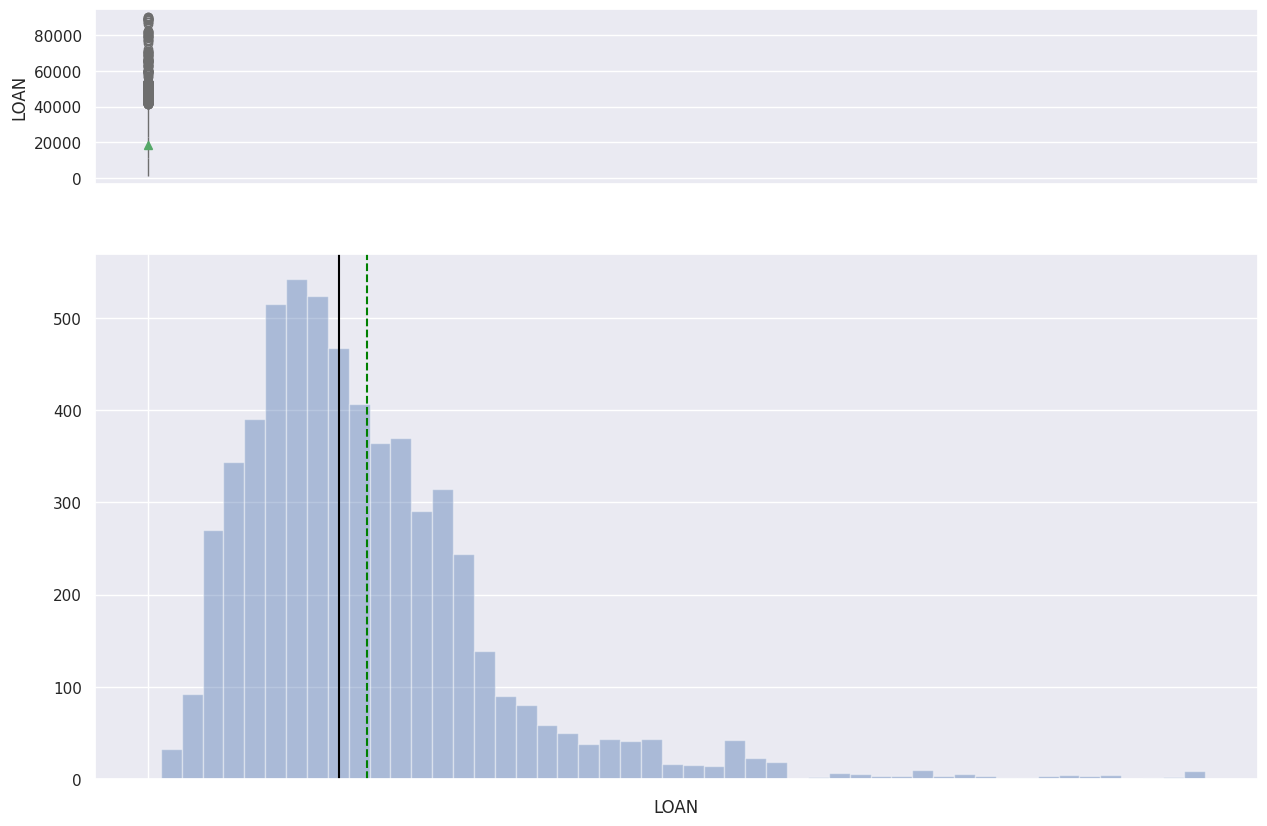

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights The histogram boxplot of loan suggests that it is right skewed,i.e large number of occurences on the left side of the plot with a mean loan amount less than ~20000 and has outliers after 40000**

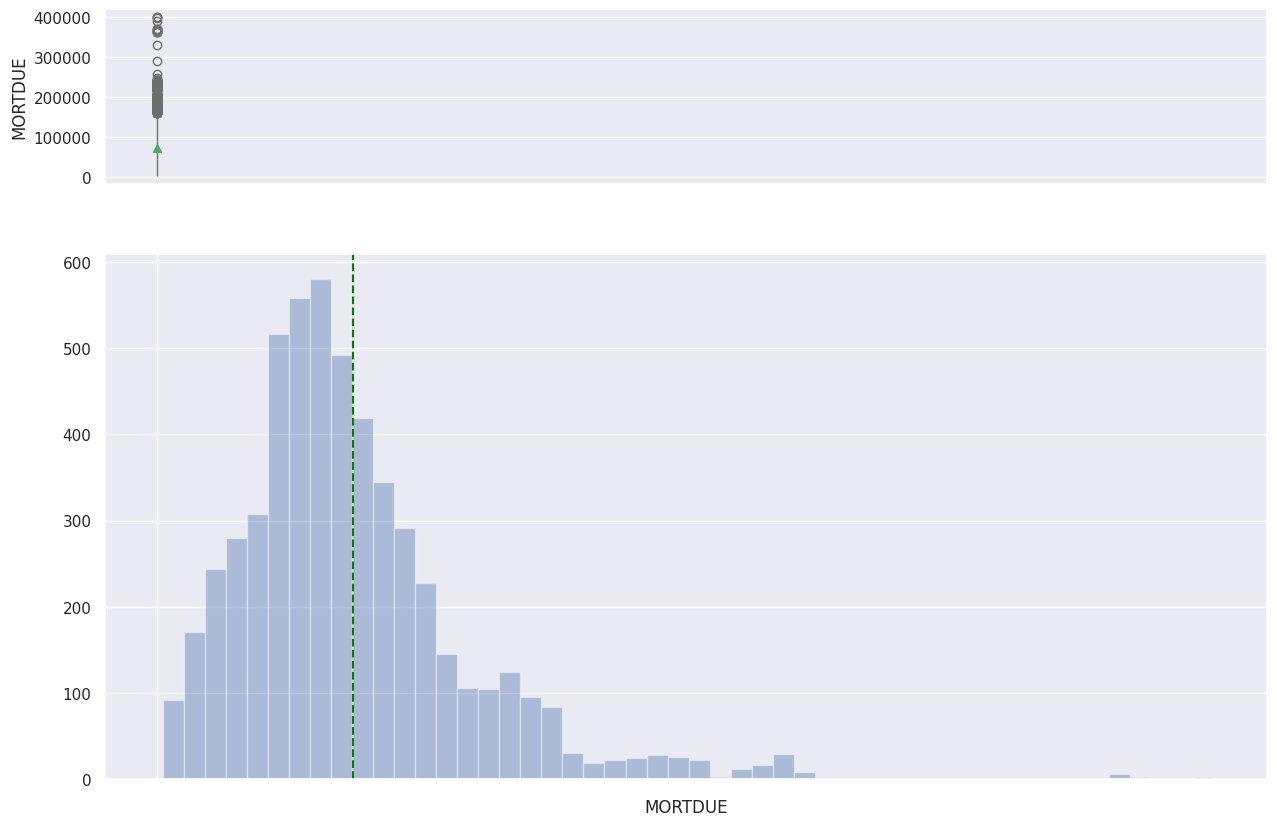

In [ ]:
histogram_boxplot(data['MORTDUE'])

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

**Insights The histogram boxplot for MORTDUE suggests that it is right skewed with a mean value of under ~100000 and outliers above ~300000**

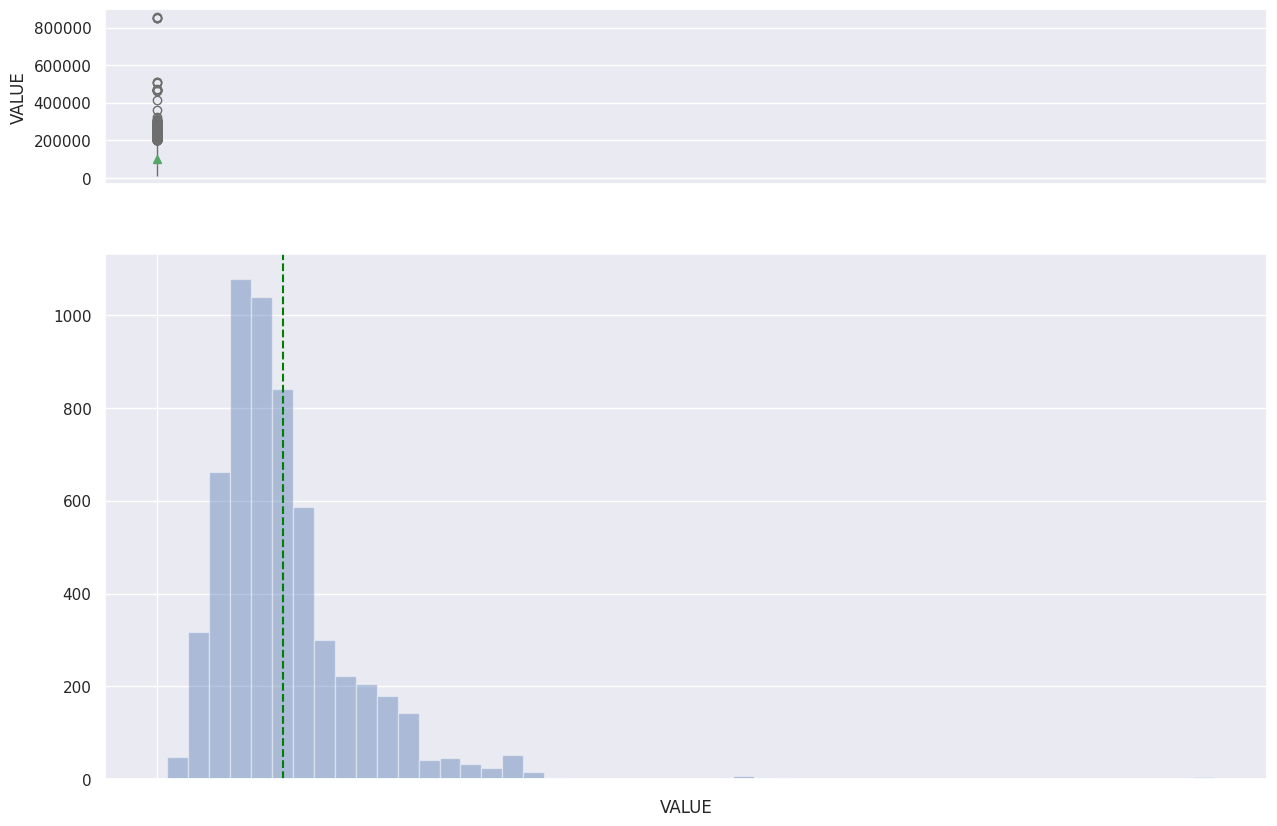

In [ ]:
histogram_boxplot(data['VALUE'])

The histogram boxplot of value suggests that it is right skewed with a mean value ~100000

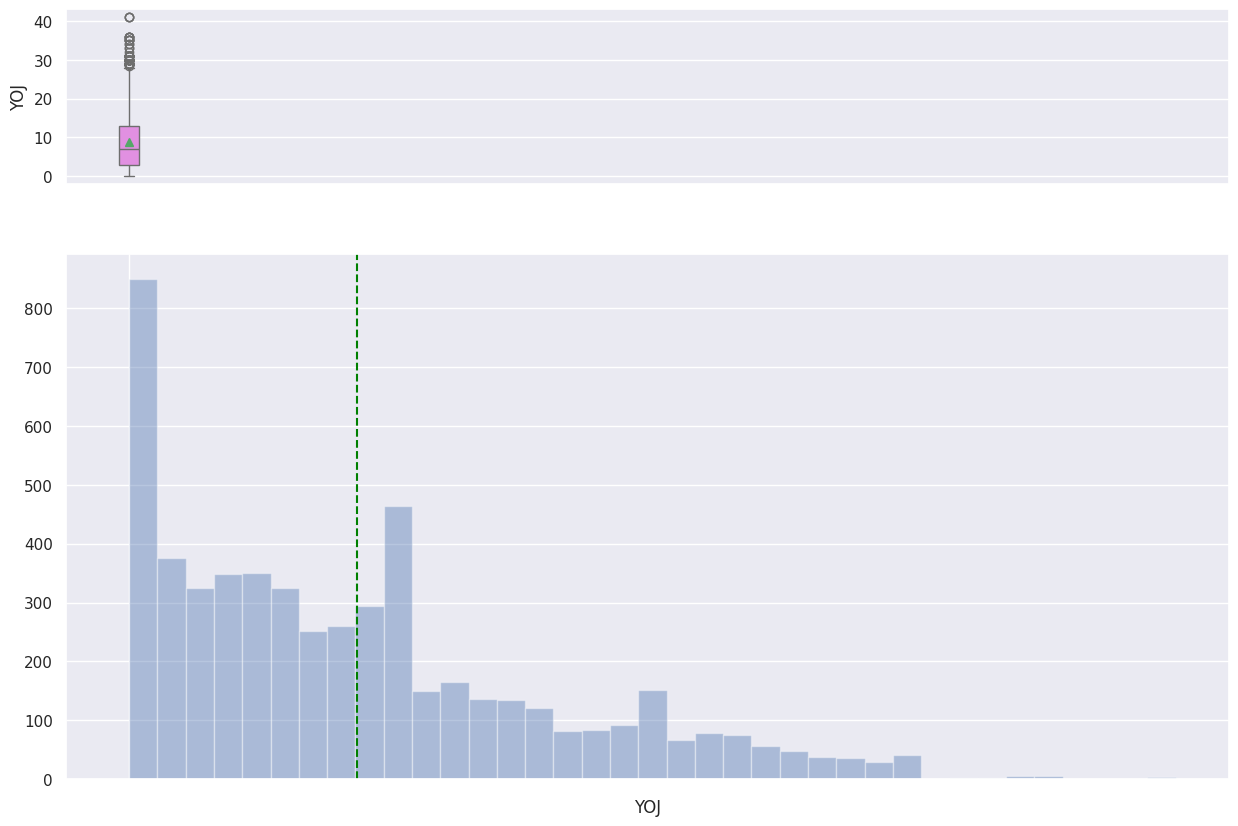

In [ ]:
histogram_boxplot(data['YOJ'])

histogram boxplot of YOJ suggests it is right skewed,median is closer to the left of the box with a mean years on the job ~8

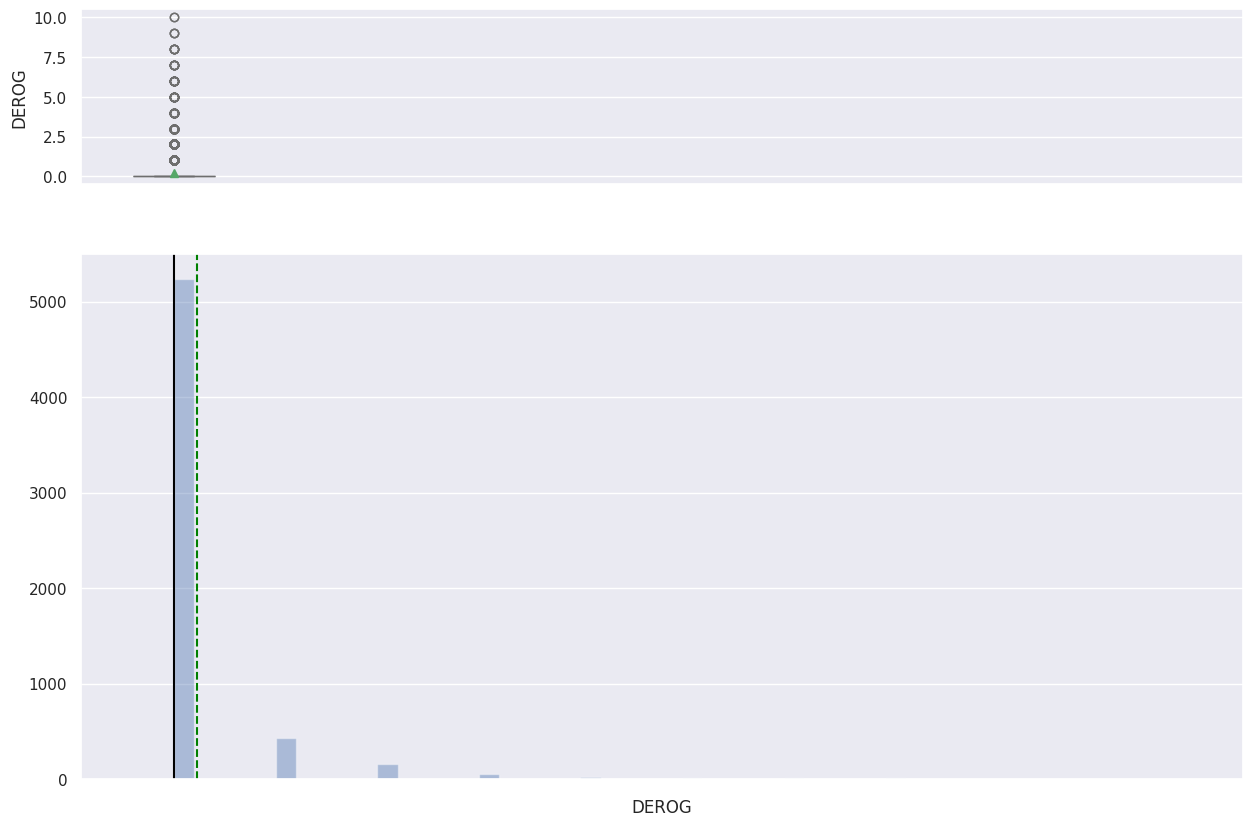

In [ ]:
histogram_boxplot(data['DEROG'])

Mean number of derogatory reports: 0.22
Most observations have no derogatory reports, with a few outliers having up to 10 reports.

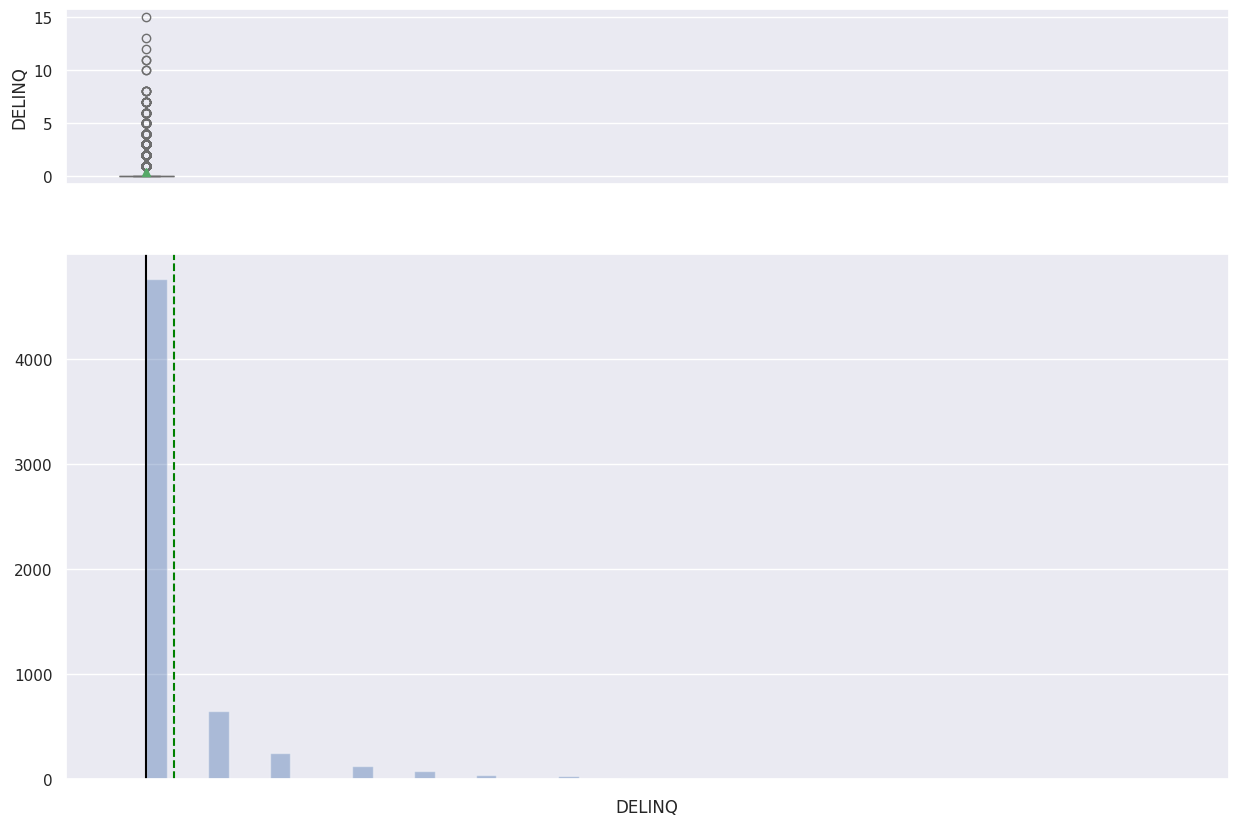

In [ ]:
histogram_boxplot(data['DELINQ'])

Mean number of delinquent credit lines: 0.41
Similarly, most observations have no delinquent credit lines, with a few outliers having up to 15 delinquent lines.

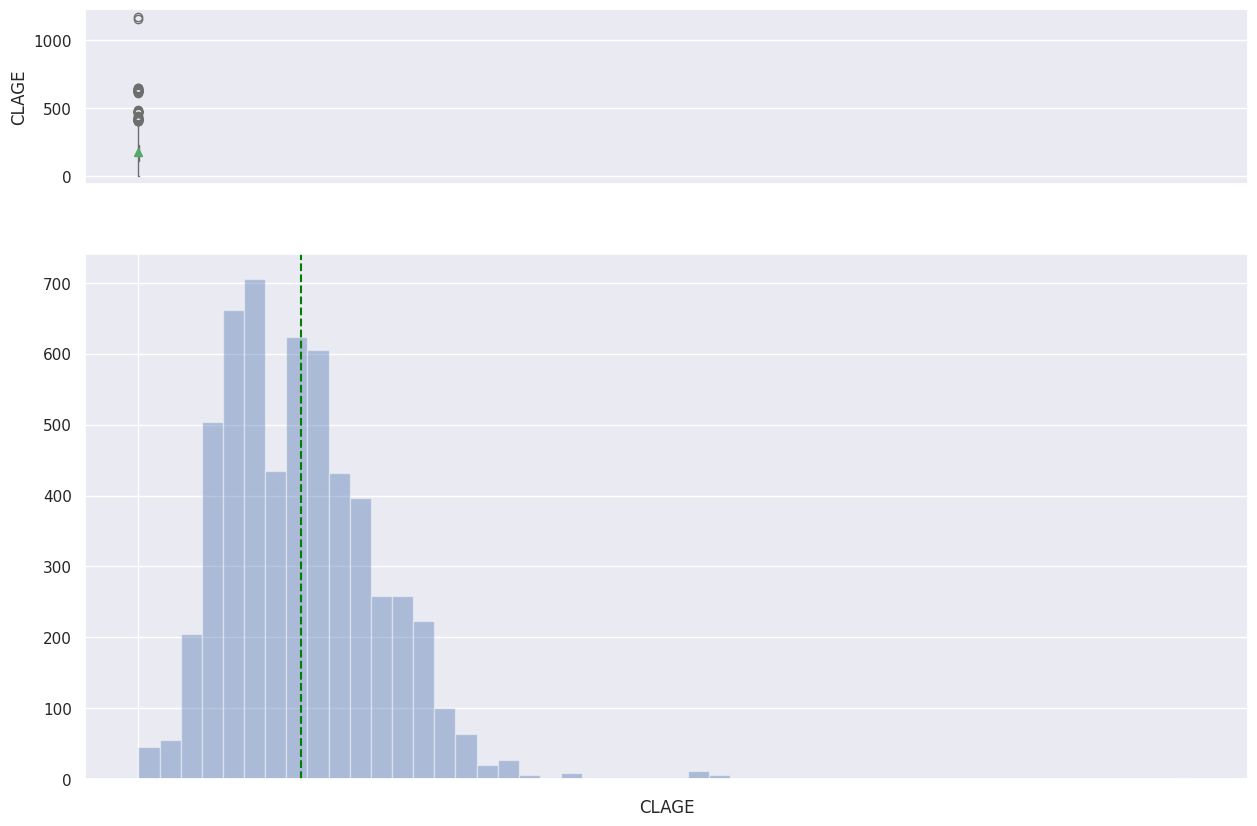

In [ ]:
histogram_boxplot(data['CLAGE'])

Mean age of the oldest credit line: 179.77 months
The age of the oldest credit line varies widely among observations.

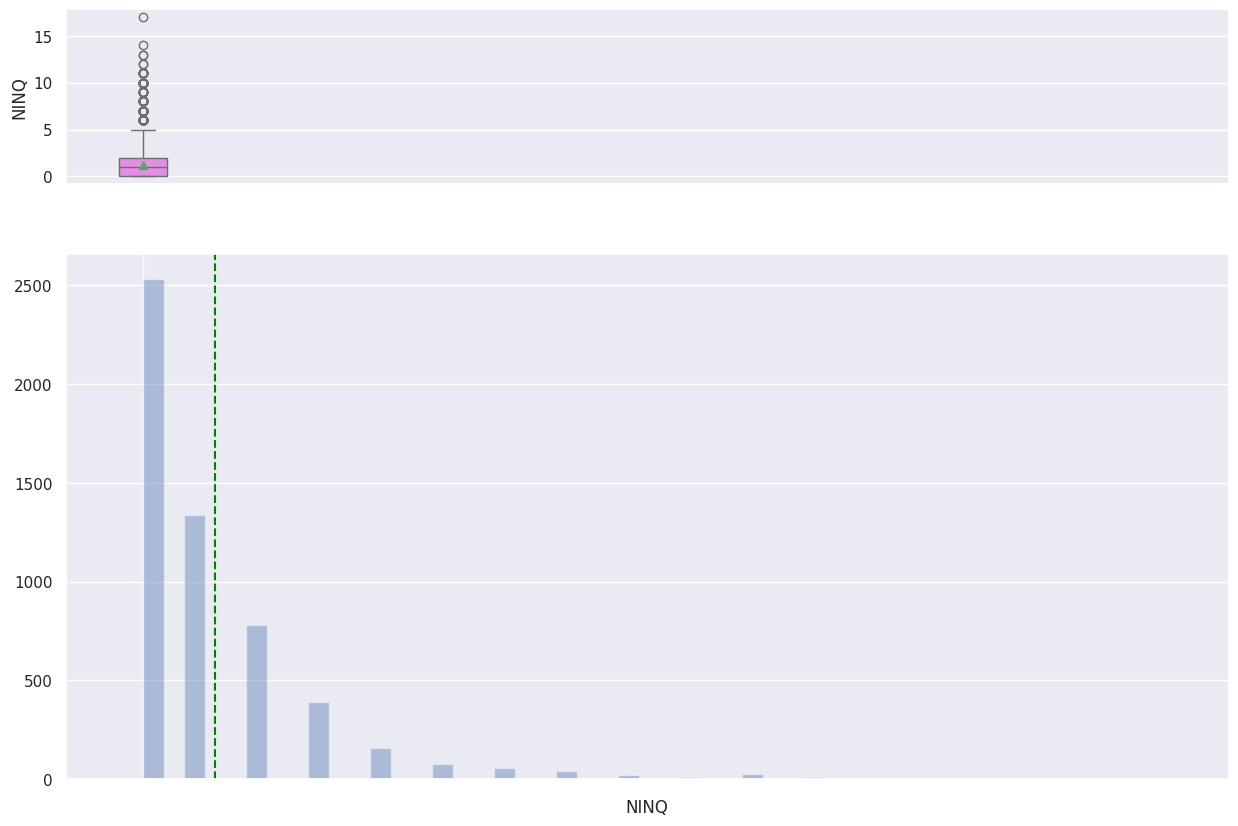

In [ ]:
histogram_boxplot(data['NINQ'])

Mean number of recent inquiries: 1.19.
Most observations have a low number of recent inquiries, with a few outliers having up to 17 inquiries.

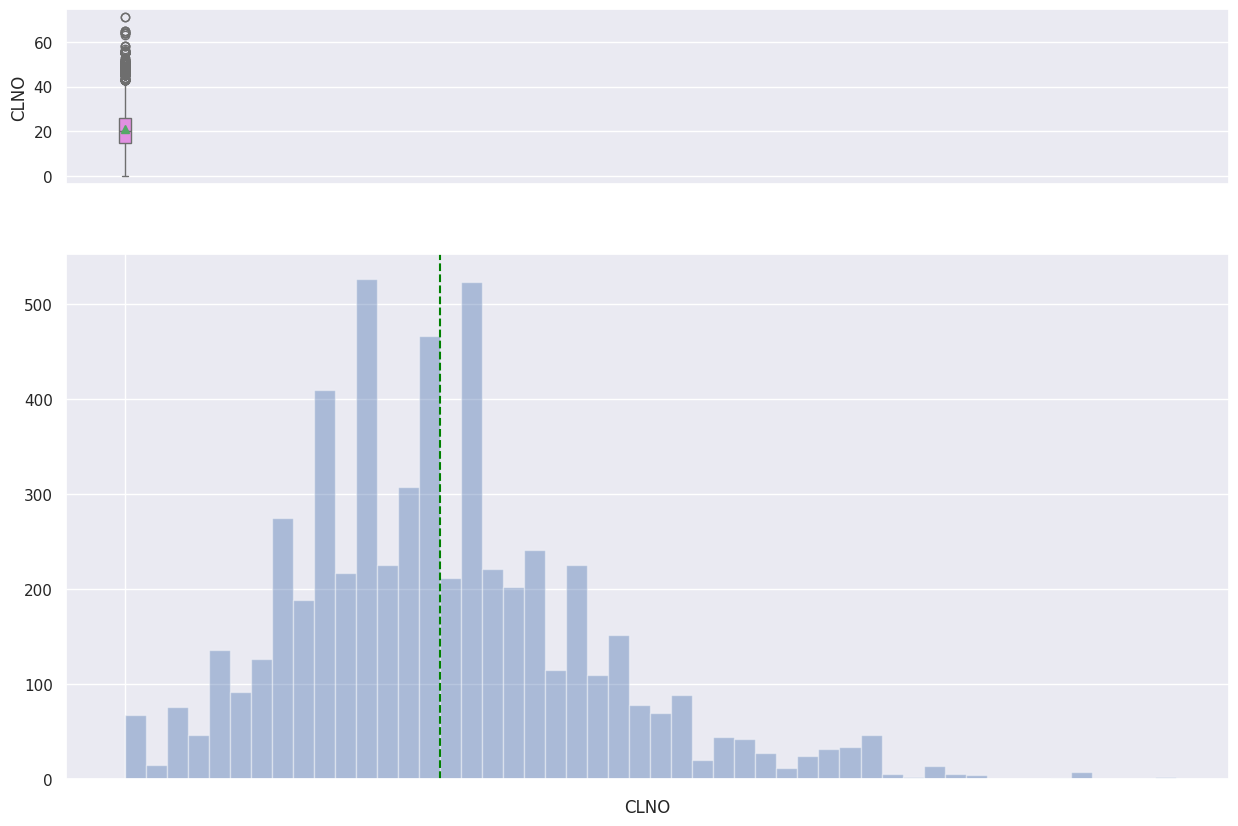

In [ ]:
histogram_boxplot(data['CLNO'])

Mean number of credit lines: 21.30
Has outliers ~above 60.


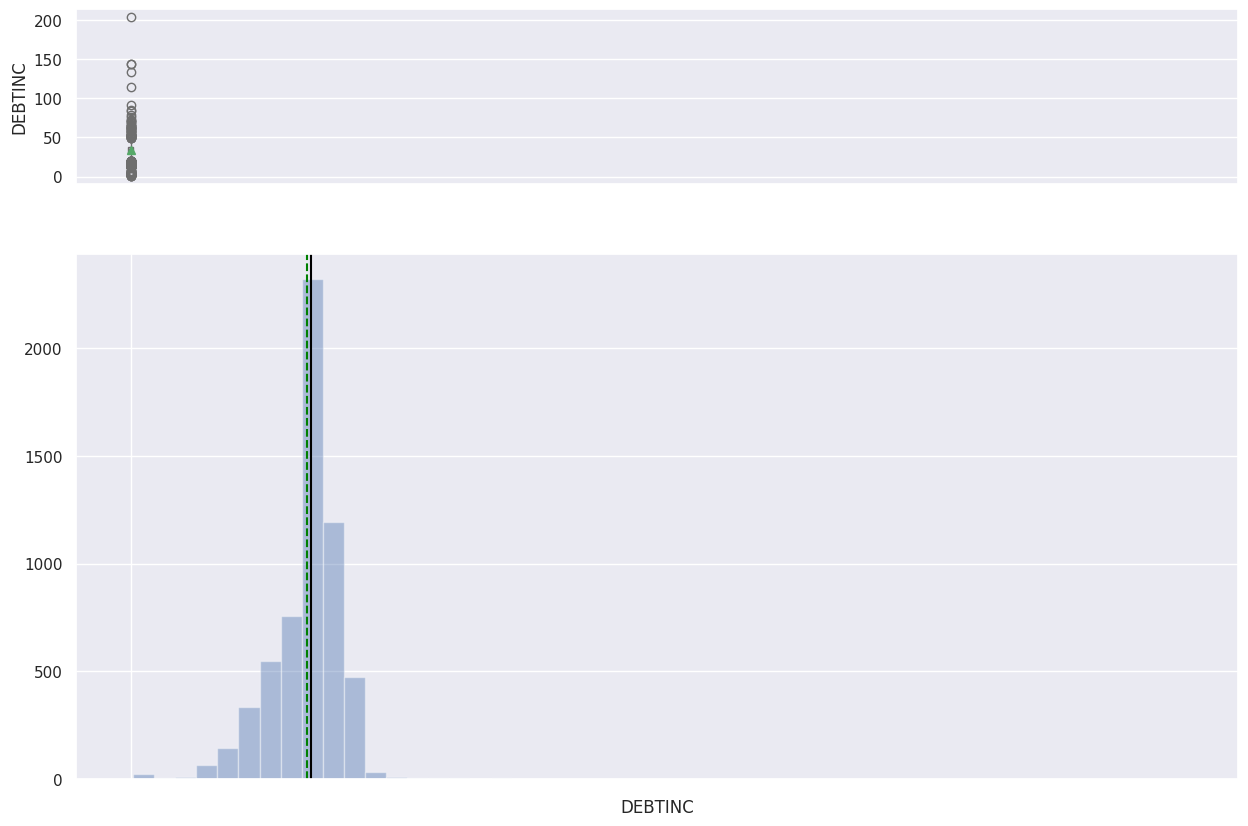

In [ ]:
histogram_boxplot(data['DEBTINC'])

Mean debt-to-income ratio: 34.00
Has outliers ~above 100.
Debt-to-income ratios vary widely among observations, with some extreme values.

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

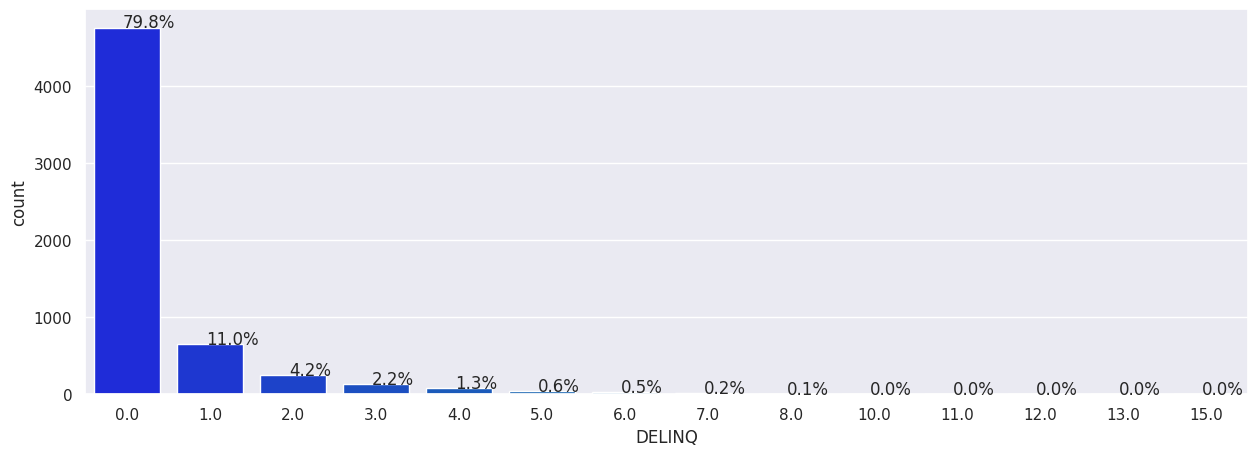

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights
Maximum number have no DELINQ VALUES.**

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

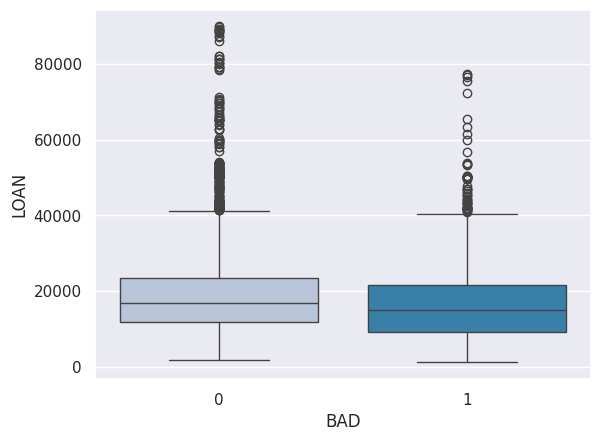

In [ ]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

**Insights The clients that paid loan, BAD = 0 have a higher loan amount than the clients who defaulted on the loan. There to seem to be outliers above 40000**

<Axes: xlabel='BAD', ylabel='MORTDUE'>

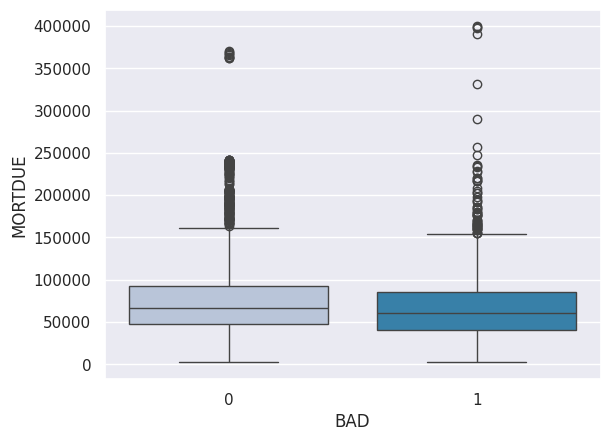

In [ ]:
sns.boxplot(x=data["BAD"],y=data['MORTDUE'],palette="PuBu")

As amount due on existing mortage increases,there seem to be outliers, i.e after ~150000.
The clients that paid loan, BAD = 0 have a higher mortage amount than the clients who defaulted on the loan.


<Axes: xlabel='BAD', ylabel='VALUE'>

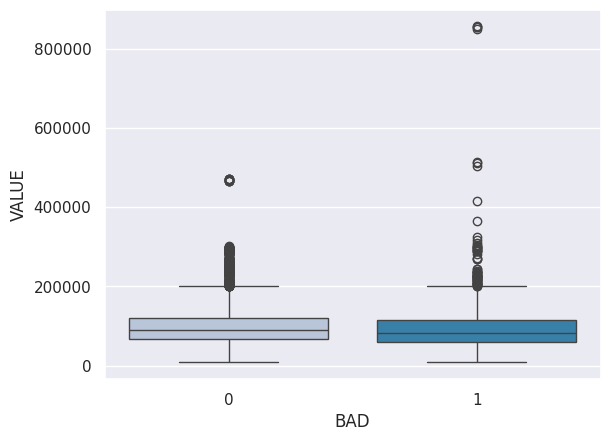

In [ ]:
sns.boxplot(x=data["BAD"],y=data['VALUE'],palette="PuBu")

The current value of the property seems pretty similar to both client who have paid the load and defaulted, with outliers above 200000

<Axes: xlabel='BAD', ylabel='YOJ'>

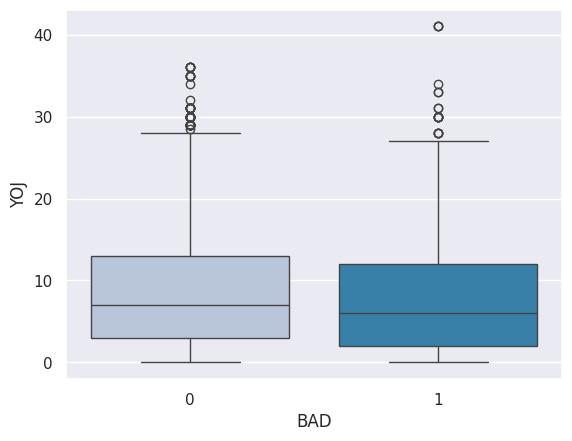

In [ ]:
sns.boxplot(x=data["BAD"],y=data['YOJ'],palette="PuBu")

Clients who have higher years at the present job seem to be the ones paying loan .

<Axes: xlabel='BAD', ylabel='DEROG'>

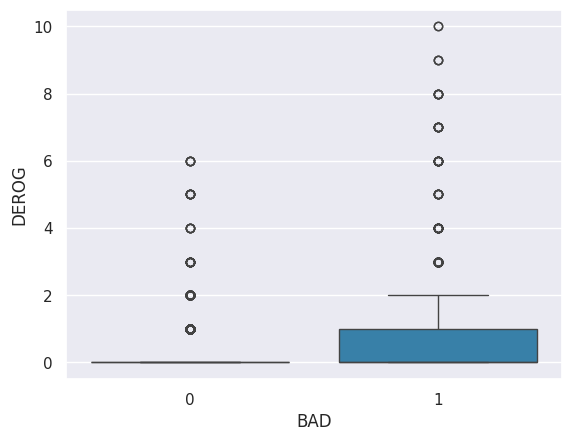

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DEROG'],palette="PuBu")

The number of major deragotary reports seem to be the ones with BAD = 1,clients who defaulted.

<Axes: xlabel='BAD', ylabel='DELINQ'>

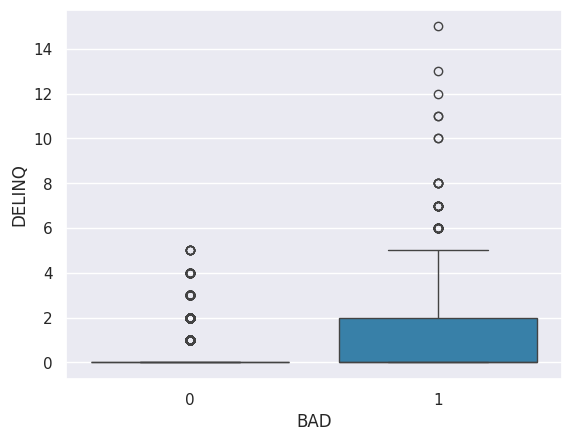

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DELINQ'],palette="PuBu")

The number of delinquent credit lines seems to be highest for the loan defaulters,BAD =1.

<Axes: xlabel='BAD', ylabel='CLAGE'>

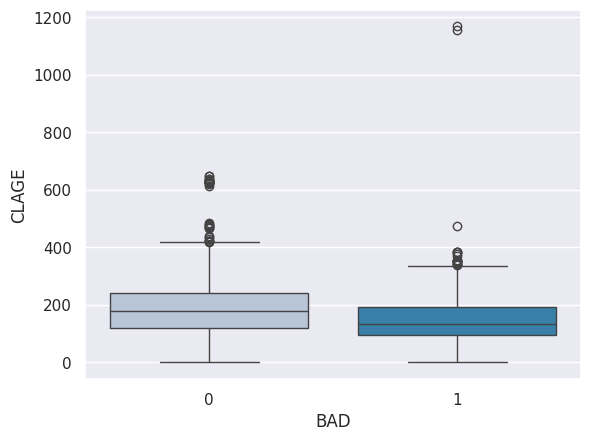

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLAGE'],palette="PuBu")

Clients who paid loan seem to be having higher CLAGE typically indicating a longer and more established credit history.
Clients who defaulted seem to be having lower CLAGE indicating a shorter credit history, which may not provide as much information about an individual's credit behavior and reliability compared to a longer credit history.

<Axes: xlabel='BAD', ylabel='NINQ'>

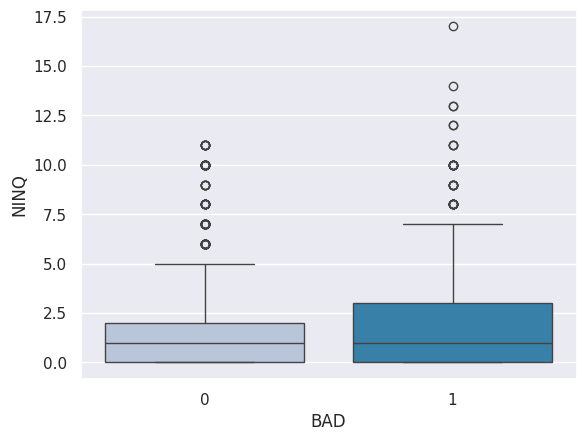

In [ ]:
sns.boxplot(x=data["BAD"],y=data['NINQ'],palette="PuBu")

The number of recent credit enquiries are morefor the loan defaulters.


<Axes: xlabel='BAD', ylabel='CLNO'>

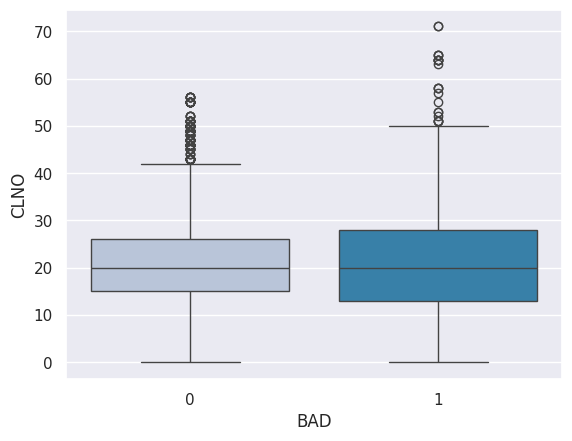

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLNO'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEBTINC'>

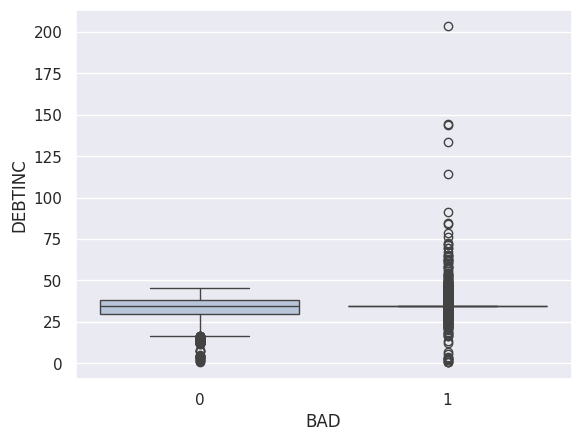

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DEBTINC'],palette="PuBu")

Debt-to-income ration is better for clients who paid loans than loan defaulters.
There seem to be a lot of outliers for BAD=1

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

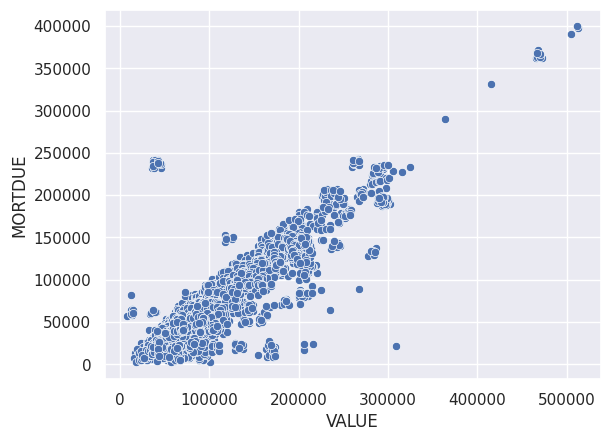

In [ ]:
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="PuBu")

**Insights: ??**

<Axes: xlabel='VALUE', ylabel='LOAN'>

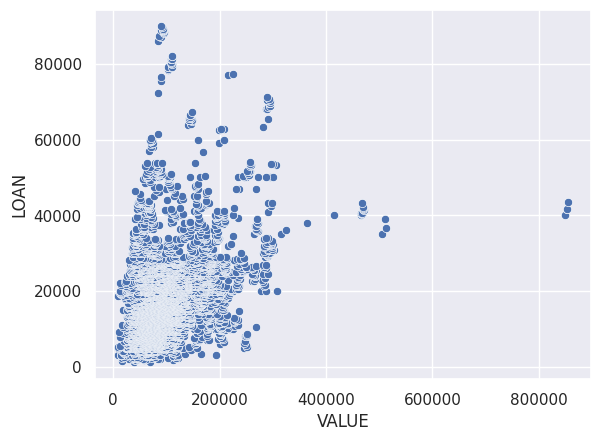

In [ ]:
sns.scatterplot(x=data["VALUE"],y=data['LOAN'],palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<Axes: xlabel='YOJ', ylabel='MORTDUE'>

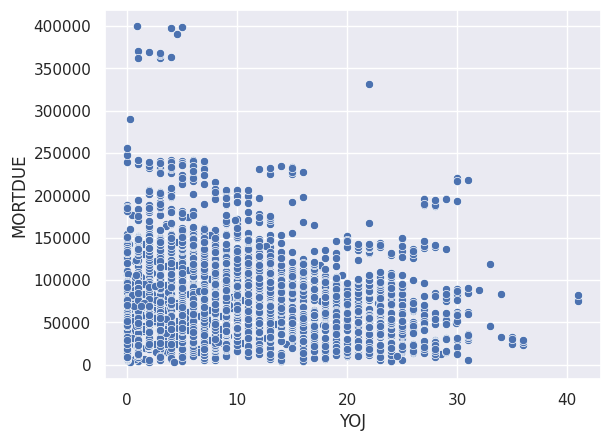

In [ ]:
sns.scatterplot(x=data["YOJ"],y=data['MORTDUE'],palette="PuBu")

**Insights ____________**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


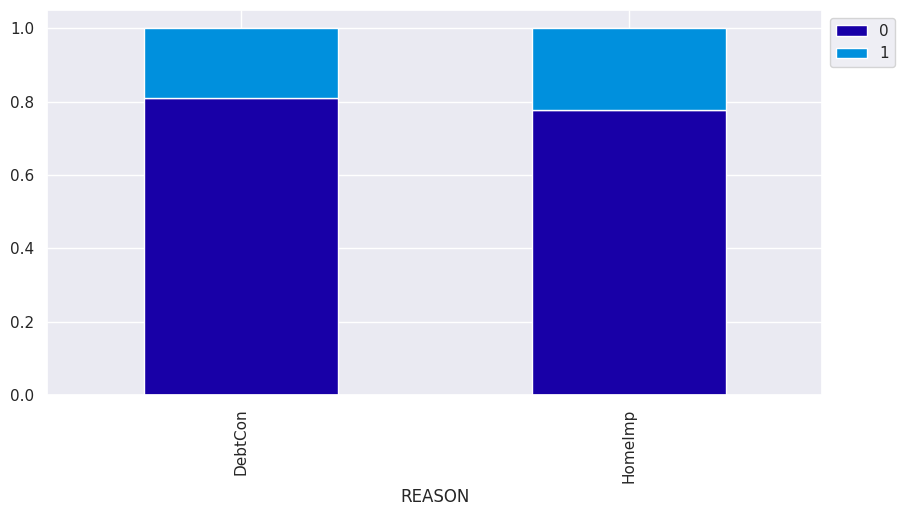

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights :
There are 2 reasons for the loan request.
Maximum clients repaid the loan irrespective of the reason of the loan.
Clients with the reason DebtCon-3183 are more than the reason Homeimp-1384 who repaid loan.
Loan defaulters are 745 who took loan for debt consolidation and 396 who took loan for home improvement.**

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


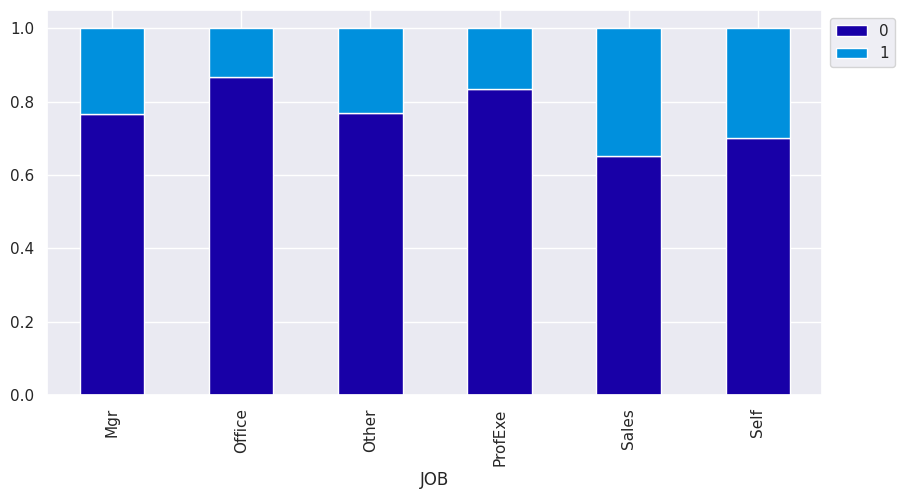

In [ ]:
stacked_plot(data['JOB'])

There are 6 categories in the JOB variable.
The maximum number clients have listed job as other, in which 1834 have repaid loan and 554 defaulted.
Next comes the job category ProfExe, where more than ~80% clients have repaid loan.
Next comes the job category office, where 823 repaid loan and 125 defaulted.
In Mgr,588 repaid loan and 179 defaulted.
In Self, 135 repaid loan and 58 defaulted.
In Sales,71 repaid loan and 38 defaulted.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

<Axes: >

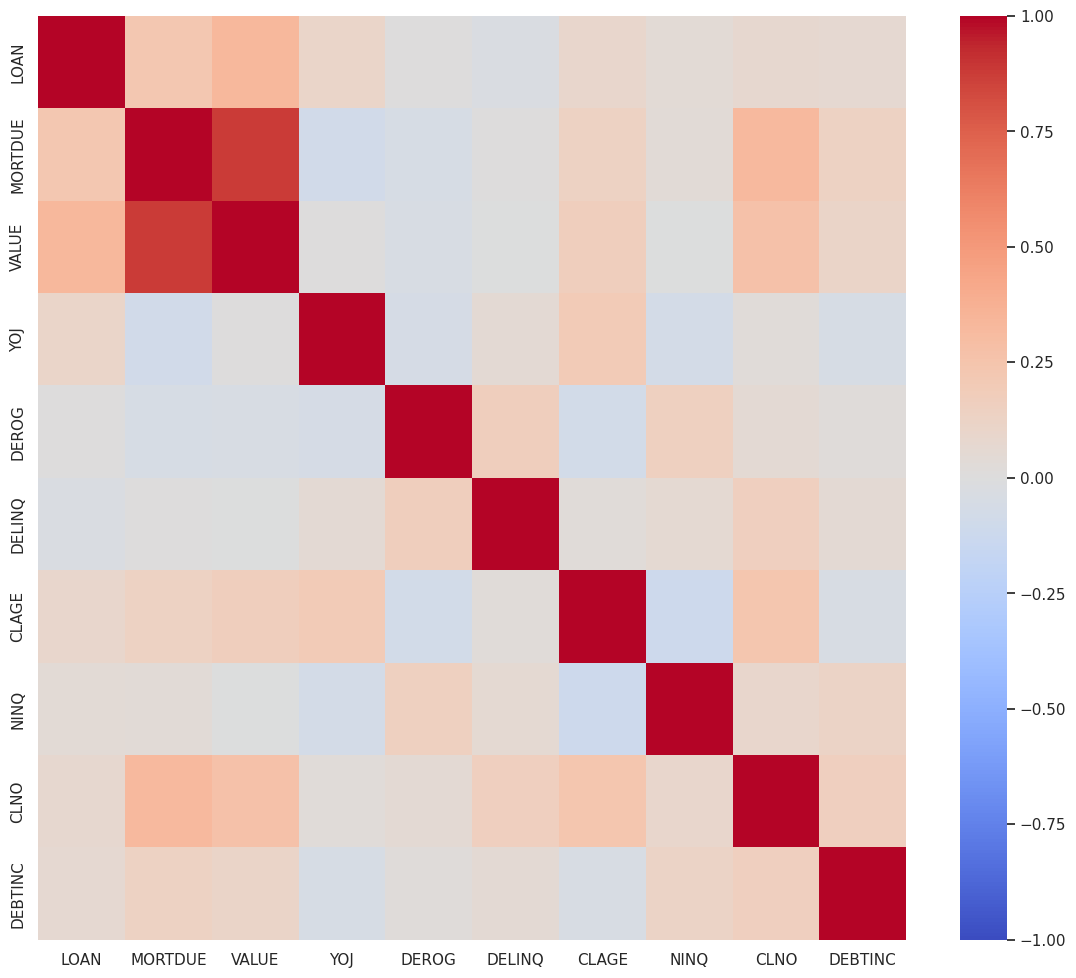

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(14,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Heat map insigts:
 -warmer colors such as red or orange represent positive correlations, while cooler colors such as blue or purple represent negative correlations.The intensity of the color indicates the strength of the correlation, with darker shades indicating stronger correlations.
 -MORTDUE and VALUE seem to have positive correlation,meaning that as one variable increases, the other variable also tends to increase.
 -LOAN and VALUE seem to have positive correlation,meaning that as one variable increases, the other variable also tends to increase.
 -MORTDUE and CLNO are also positively correlated.



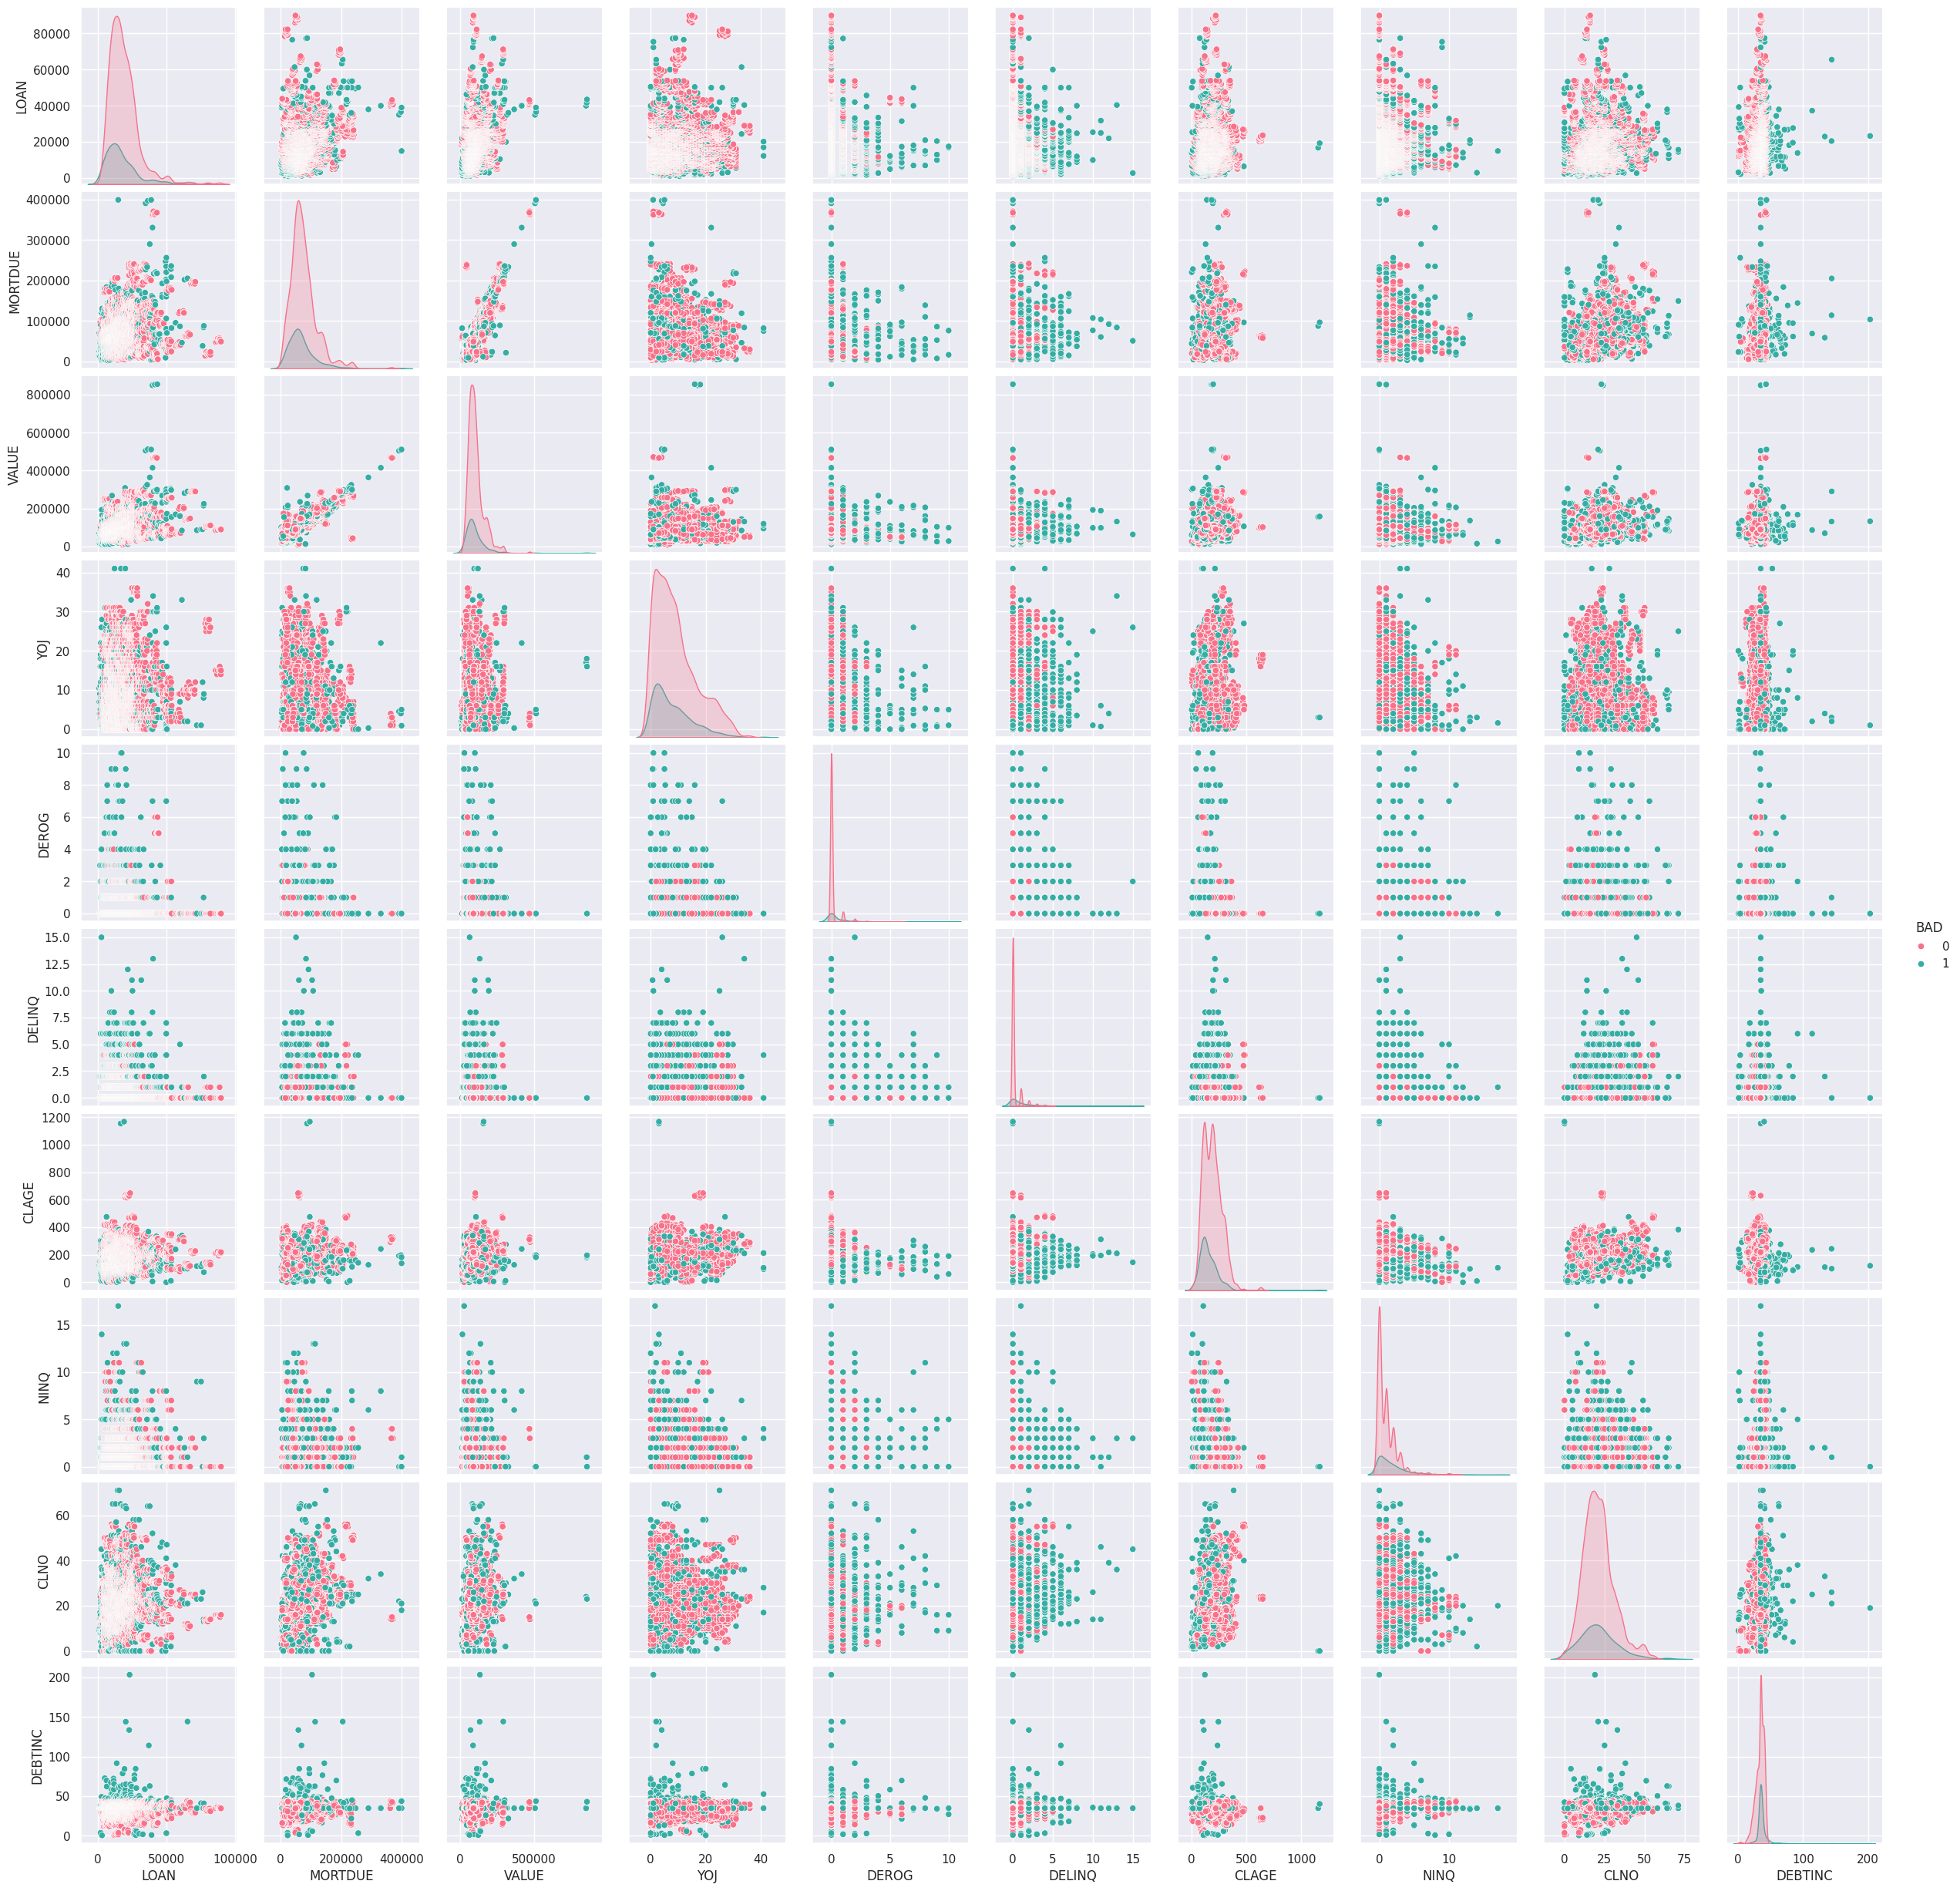

In [ ]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

sns.pairplot(data, hue='BAD', palette='husl')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them?
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df


In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [ ]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
dtype: int64

In [ ]:
data.isnull().sum()

BAD          0
LOAN         0
MORTDUE    518
VALUE      112
REASON     252
JOB        279
YOJ        515
DEROG        0
DELINQ       0
CLAGE      308
NINQ       510
CLNO       222
DEBTINC      0
dtype: int64

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
#@title
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = df.drop(["BAD"], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = df["BAD"]

### **Splitting the data into 70% train and 30% test set**

In [ ]:
#@title
# Split the data into training and test set
# Remove _________ and complete the code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### **Think about it**
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

Changing the split ratio between the training and test sets can affect the performance of machine learning models.

The split ratio determines the amount of data available for training and testing the model. A larger training set (e.g., 80% training, 20% testing) can provide more data for the model to learn from, potentially leading to better performance, especially if the dataset is large. However, a larger testing set (e.g., 70% training, 30% testing) can provide more data to evaluate the model's performance, which is important for obtaining reliable estimates of model performance.

A larger training set may help the model generalize better to unseen data, reducing the risk of overfitting. However, a smaller testing set may lead to higher variance in the estimated performance metrics, as the evaluation may be more sensitive to the particular subset of data used for testing.

In the case of imbalanced data, where one class is significantly more prevalent than the other(s), it's important to ensure that both the training and testing sets maintain the same class distribution to avoid bias in model evaluation. This can be achieved by using techniques such as stratified sampling or resampling methods (e.g., oversampling, undersampling) to balance the class distribution in both sets.

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why.

In [ ]:
#@title
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 24)
Shape of test set :  (1788, 24)
Percentage of classes in training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


Logistic Regression is a supervised learning algorithm, generally used for binary classification problems, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                    P(Y)=1/(1 + exp(-X))

### **Build a Logistic Regression Model**

In [ ]:
#@title
# Defining the Logistic regression model
# Remove _________ and complete the code
lg = LogisticRegression()


# Fitting the model on the training data
# Remove _________ and complete the code

lg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.72      0.02      0.04       817

    accuracy                           0.81      4172
   macro avg       0.76      0.51      0.47      4172
weighted avg       0.79      0.81      0.73      4172



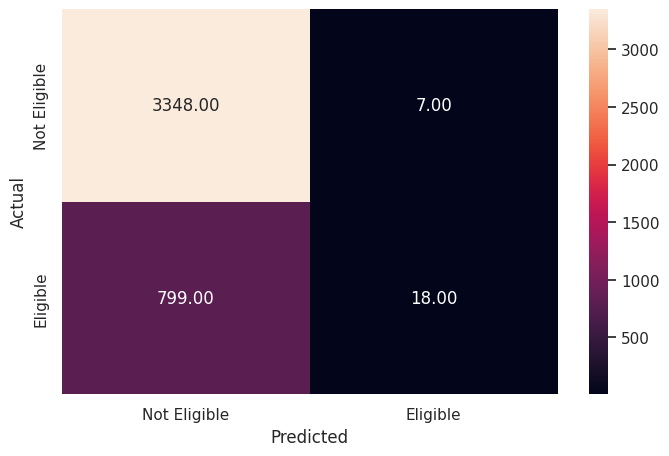

In [ ]:
#@title
#Predict for train set
# Remove _________ and complete the code
y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, y_pred_train)

For class 0 (negative class), the precision is 0.81, indicating that 81% of the instances predicted as class 0 were actually class 0. For class 1 (positive class), the precision is 0.72, indicating that 72% of the instances predicted as class 1 were actually class 1.

For class 0, the recall is 1.00, indicating that 100% of the actual class 0 instances were correctly classified as class 0. However, for class 1, the recall is only 0.02, indicating that only 2% of the actual class 1 instances were correctly classified as class 1.

it appears that the model performs well in classifying class 0 (negative class) but poorly in classifying class 1 (positive class).This indicates that the model has a high number of false negatives which is reflected in the low recall and F1-score for class 1.

Predicting a customer will default but the customer doesn't default in reality (False Positive)
Predicting a customer will not default but the customer defaults in reality (False Negative), which is more expensive/damaging as this will lead to a huge loss for the bank if customers do not pay the loan back to the bank. So we need to minimize the false negatives,i.e maximize recall.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



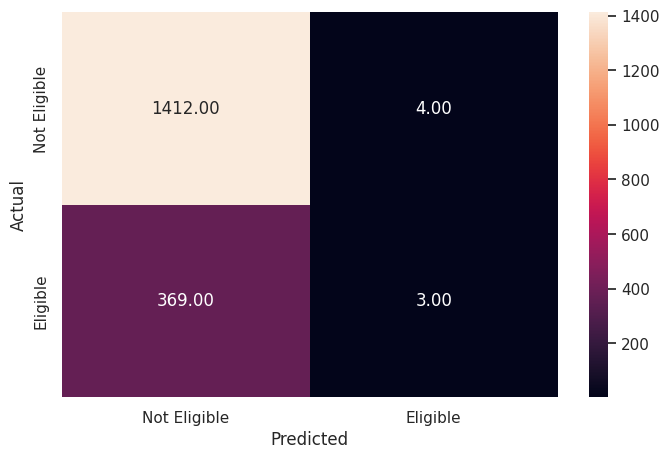

In [ ]:
#@title
#Predict for test set
# Remove _________ and complete the code

y_pred_test = lg.predict(X_test)


#checking the performance on the test dataset
# Remove _________ and complete the code

metrics_score(y_test, y_pred_test)

**Observations: Similar to the training data, the model performs well in classifying class 0 (negative class) but poorly in classifying class 1 (positive class), especially in terms of recall and F1-score. This indicates that the model has a high number of false negatives (instances of class 1 incorrectly classified as class 0), which is reflected in the low recall and F1-score for class 1.**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

coeff: It represents the change in the output Y due to a change of one unit in the independent variable (everything else held constant)

In [ ]:
#@title
# Printing the coefficients of logistic regression
# Remove _________ and complete the code

cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
DEBTINC                      0.019052
CLNO                         0.007887
NINQ                         0.004595
VALUE_missing_values_flag    0.000673
JOB_Self                     0.000183
REASON_HomeImp               0.000171
JOB_Sales                    0.000132
CLAGE_missing_values_flag    0.000110
JOB_Other                    0.000089
CLNO_missing_values_flag     0.000018
REASON_missing_values_flag   0.000008
DELINQ                       0.000000
DEROG                        0.000000
VALUE                       -0.000001
MORTDUE                     -0.000005
LOAN                        -0.000026
MORTDUE_missing_values_flag -0.000104
JOB_ProfExe                 -0.000190
YOJ_missing_values_flag     -0.000282
NINQ_missing_values_flag    -0.000317
JOB_missing_values_flag     -0.000360
JOB_Office                  -0.000475
YOJ                         -0.002319
CLAGE                       -0.007618

**Insights :
Features which positively affect loan approval process are:
DEBTINC
CLNO
NINQ
Job_Self
REASON_HomeImp
Job_sales
Job_Other

Features which negatively affect loan approval process are:
VALUE
MORTDUE
LOAN
JOB_ProfExe
JOB_Office
YOJ
CLAG

The coefficients that positively and negatively affect the attrition rate seem to be quite similar for logistic regression and LDA. This means they are capturing the same pattern and giving nearly the same conclusions from the dataset.

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

**

We can use different thresholds for the logistic regression model to adjust its sensitivity and specificity, which in turn affects the precision, recall, and F1-score.

By changing the threshold, we can control the balance between false positives and false negatives.

First, we need to predict probabilities instead of class labels.

Then, choose a threshold value that best suits. A threshold of 0.5 is commonly used, but we can experiment with different thresholds based on the trade-off between false positives and false negatives that we are willing to accept.

Finally, classify instances based on whether their predicted probability is above or below the chosen threshold.

After classifying instances with the new threshold, evaluate the performance of the model using metrics such as precision, recall, F1-score, and accuracy.



### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

Tree-based models are inherently robust to outliers, so it's generally not necessary to treat outliers specifically for tree-based models, it's still essential to preprocess the data appropriately by handling missing values, encoding categorical variables, and scaling numerical features if required.
Ensemble methods like random forests and gradient boosting combine multiple trees to make predictions, further reducing the impact of outliers.


#### Data Preparation for the tree based model

In [ ]:
#@title
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)


In [ ]:
#@title
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with mode.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [ ]:
#@title
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code

X = data.drop(["BAD"], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = data["BAD"]

#### Split the data

In [ ]:
#@title
# Split the data into training and test set
# Remove _________ and complete the code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [ ]:
#@title
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

d_tree = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


In [ ]:
#@title
#fitting Decision tree model
# Remove ___________ and complete the code

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3355
           1       0.91      0.70      0.79       817

    accuracy                           0.93      4172
   macro avg       0.92      0.84      0.87      4172
weighted avg       0.93      0.93      0.92      4172



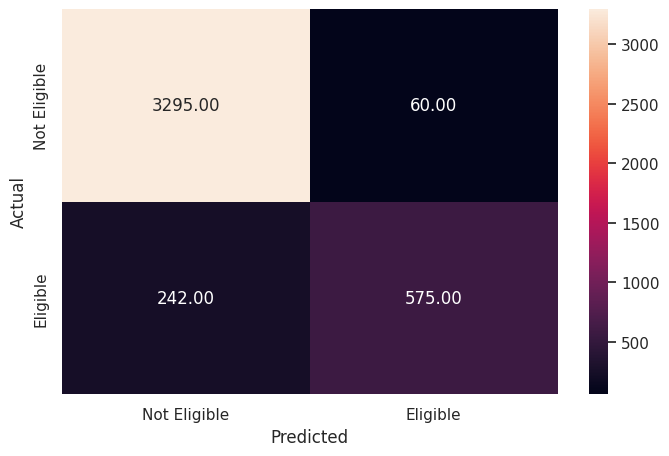

In [ ]:
#@title
# Checking performance on the training data
# Remove ___________ and complete the code

y_pred_train1 =d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)



The model shows perfect performance on the test set, achieving a 100% accuracy, precision, recall, and F1-score for both classes. However, it's essential to consider if such high performance is realistic and not overfitting ,i.e. performs exceptionally well on the training data but fails to generalize to unseen data.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       944
           1       0.71      0.63      0.67       248

    accuracy                           0.87      1192
   macro avg       0.81      0.78      0.79      1192
weighted avg       0.86      0.87      0.87      1192



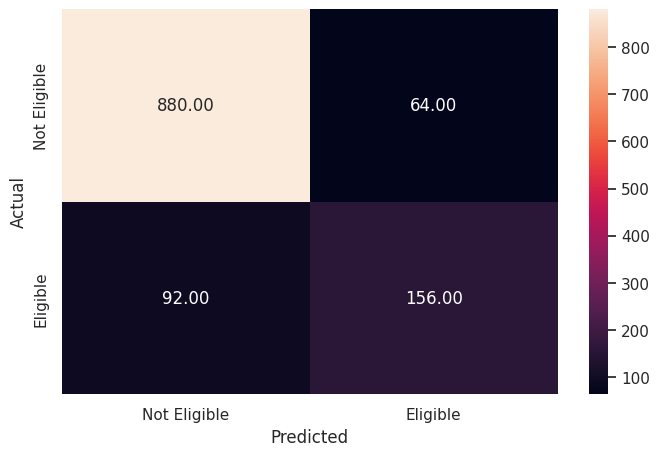

In [ ]:
#@title
# Checking performance on the testing data
# Remove _________ and complete the code

y_pred_test1 =d_tree.predict(X_test)

metrics_score(y_test,y_pred_test1)

**Insights : On the test data , we can see that class 0 has high precision and recall.
Class 1 has 0.71 precision and a lower recall of 0.63.


The decision tree works well on the training data, but not so well on the test data,as the recall is 0.63 in comparison to 1 for training dataset,i.e. it is overfitting. We would want to maximize recall,to minimalize false negatives.
**

### **Think about it:**
- Can we improve this model? -yes
- How to get optimal parameters in order to get the best possible results?-hyperparameter tuning

In [ ]:
print (pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.337420
DEBTINC                      0.124403
VALUE                        0.074784
CLAGE                        0.071835
YOJ                          0.065385
LOAN                         0.059865
CLNO                         0.049953
DELINQ                       0.049526
MORTDUE                      0.041834
NINQ                         0.030797
DEROG                        0.016196
VALUE_missing_values_flag    0.010461
JOB_Other                    0.009637
DEROG_missing_values_flag    0.008861
JOB_ProfExe                  0.008164
JOB_Office                   0.006824
REASON_HomeImp               0.006439
JOB_Sales                    0.005911
JOB_missing_values_flag      0.004339
NINQ_missing_values_flag     0.004082
CLAGE_missing_values_flag    0.003594
JOB_Self                     0.002728
MORTDUE_missing_values_flag  0.002327
DELINQ_missing_values_flag   0.002141
YOJ_missing_values_flag      0.001501
REASON_missi

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
#@title
# Choose the type of classifier.
# Remove _________ and complete the code

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})


# Grid of parameters to choose from
# Remove _________ and complete the code

parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data.
# Remove _________ and complete the code

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, min_samples_leaf=25, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3827
           1       0.61      0.87      0.72       941

    accuracy                           0.86      4768
   macro avg       0.79      0.87      0.81      4768
weighted avg       0.89      0.86      0.87      4768



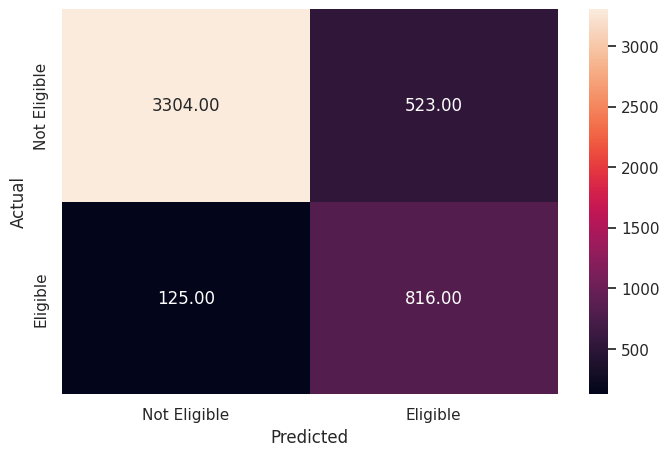

In [ ]:
#@title
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

After hyperparameter tuning, for training dataset,class 0 has high precision and high recall.
Class 1 has high recall too with a lower precision.
Overall model performance is well.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       944
           1       0.61      0.77      0.68       248

    accuracy                           0.85      1192
   macro avg       0.77      0.82      0.79      1192
weighted avg       0.87      0.85      0.86      1192



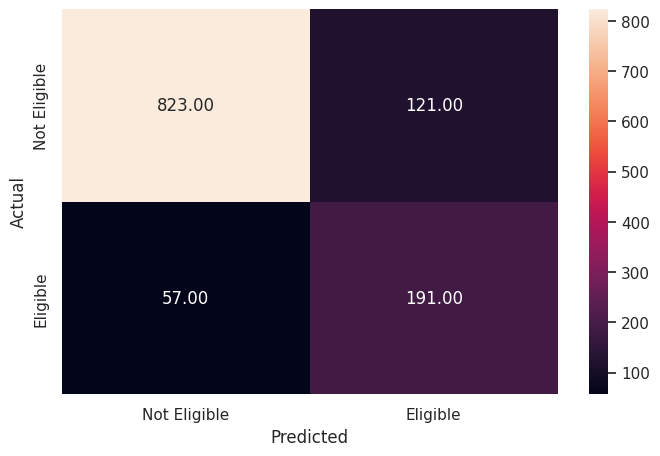

In [ ]:
#@title
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)


**Insights : After hyperparameter tuning, on the test dataset we can see that precision and recall seem to be lower for class 1 compared to class 0.
**

#### Plotting the Decision Tree

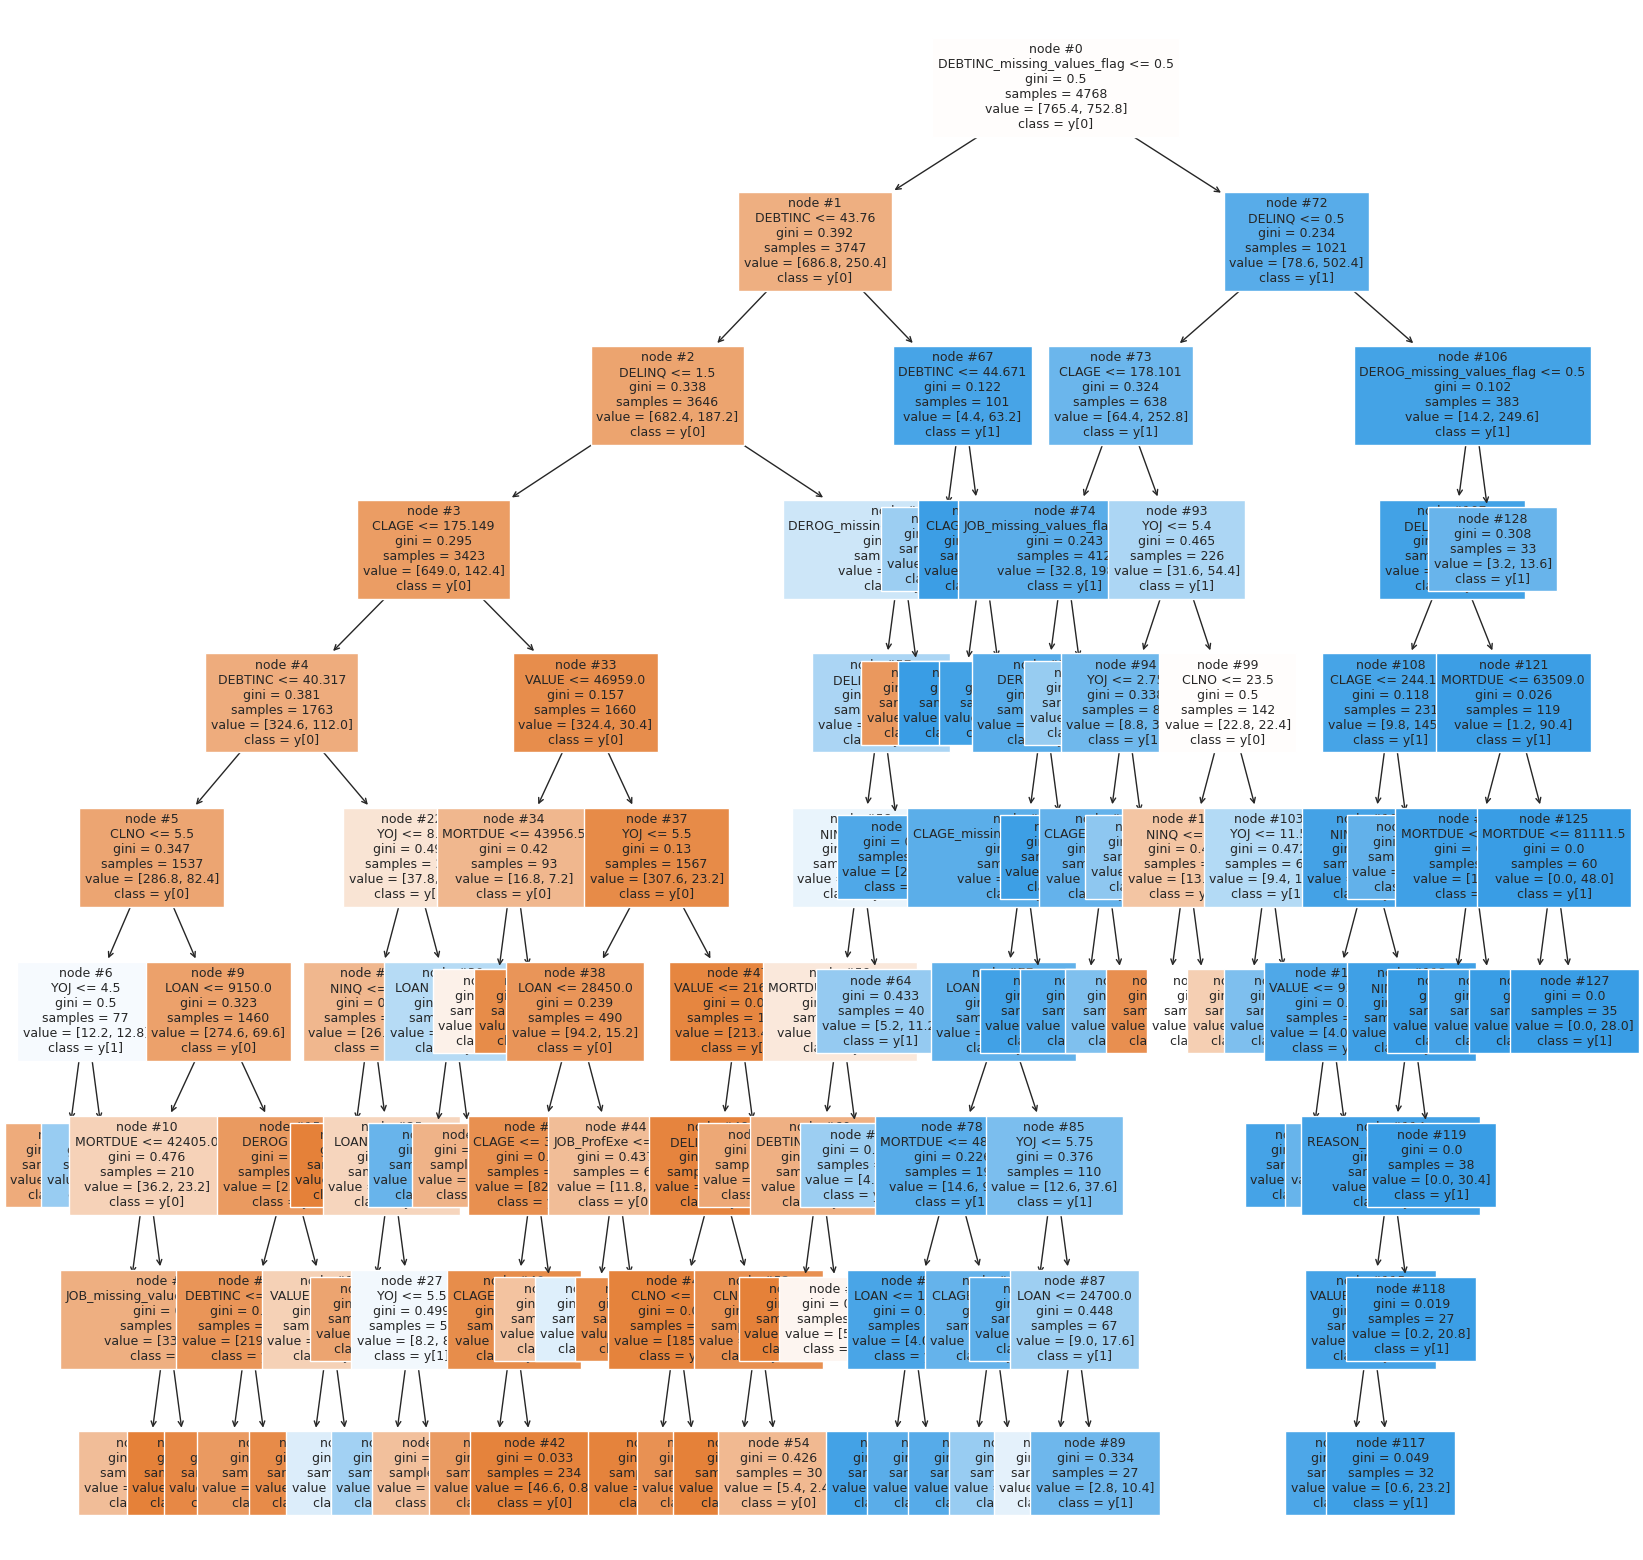

In [ ]:
#@title
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

Note: Blue leaves represent the clients who defaulted on the loan, i.e., y[1], while the orange leaves represent the clients who repaid loan, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

The first split(root node) is made on the feature  DEBTINC_Missing_values_flag.
If the value of DEBTINC_Missing_Values_Flag < = 0.5,
YES-Tree goes to the internal node #72, DELINQ <= 0.5, showing clients who defaulted on the loan.
NO-Tree goes to the internal node #1, DEBTINC <= 43.67, showing clients who repaid loan.



In [ ]:
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.560021
DEBTINC                      0.164869
DELINQ                       0.071718
CLAGE                        0.046812
YOJ                          0.030516
LOAN                         0.029612
MORTDUE                      0.024038
CLNO                         0.015729
VALUE                        0.014731
NINQ                         0.011626
DEROG_missing_values_flag    0.010344
DEROG                        0.009035
JOB_missing_values_flag      0.004853
JOB_ProfExe                  0.003893
CLAGE_missing_values_flag    0.002047
REASON_HomeImp               0.000155
REASON_missing_values_flag   0.000000
YOJ_missing_values_flag      0.000000
VALUE_missing_values_flag    0.000000
DELINQ_missing_values_flag   0.000000
NINQ_missing_values_flag     0.000000
CLNO_missing_values_flag     0.000000
MORTDUE_missing_values_flag  0.000000
JOB_Office                   0.000000
JOB_Other                    0.000000
JOB_Sales   

DEBTINC_missing_values_flag and DEBTINC seem to be the most important features, followed by DELINQ,CLAGE,YOJ,LOAN and MORTDUE.

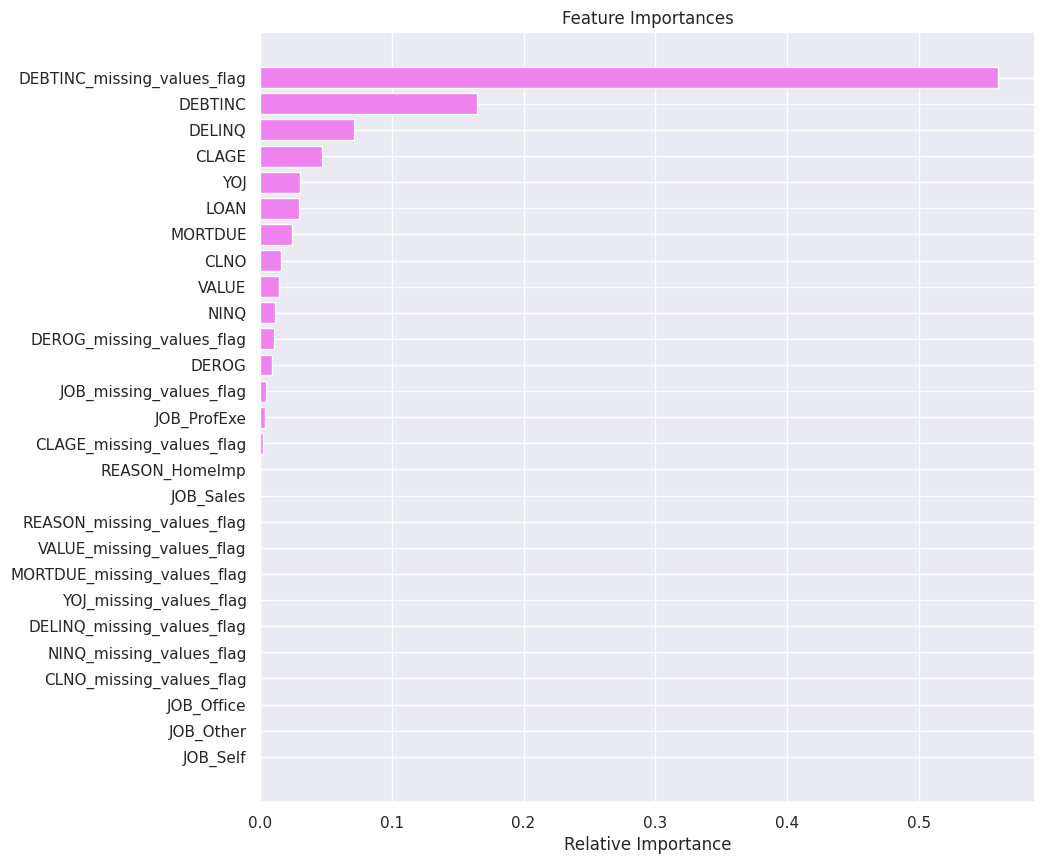

In [ ]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet',align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
#@title
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator1 = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

rf_estimator1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



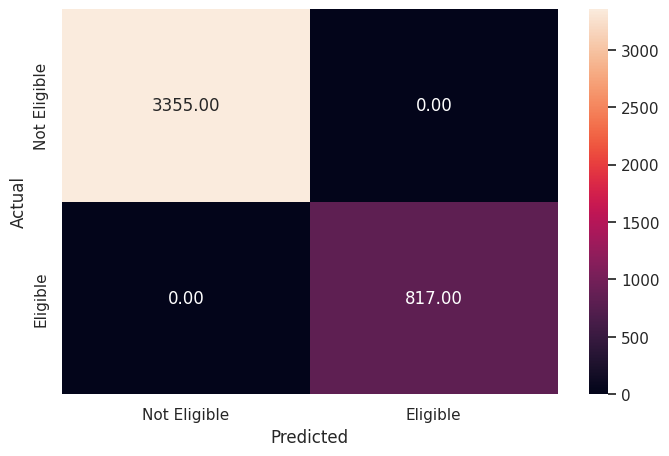

In [ ]:
#@title
#Checking performance on the training data
# Remove _________ and complete the code

y_pred_train3 =rf_estimator1.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1416
           1       0.83      0.63      0.72       372

    accuracy                           0.90      1788
   macro avg       0.87      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



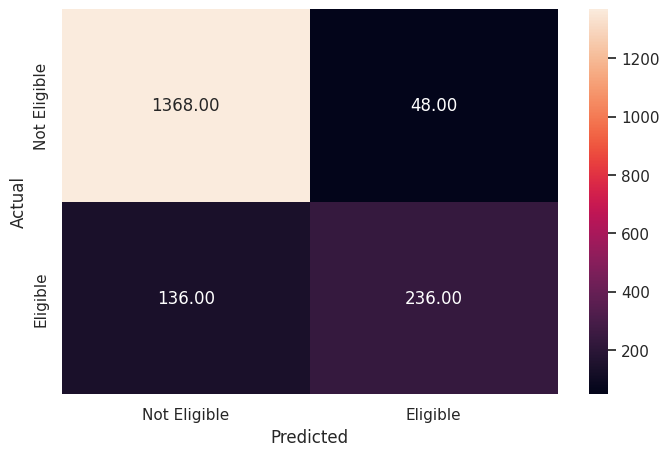

In [ ]:
#@title
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test3 = rf_estimator1.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations: Model is giving 100% score on all metrics, precision,recall,accuracy on the training set, which indicates it is performing very well on training set.
But on the test set,class 0 has high precision and recall, but class 1 has a decrease in recall(0.63) compared to 1 on training set, so we can see data is overfitting on test data and we need to maximize recall to minimize false negatives. **

### **Build a Random Forest model with Class Weights**

In [ ]:
#@title
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)



# Fitting Random Forest model
# Remove _________ and complete the code

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



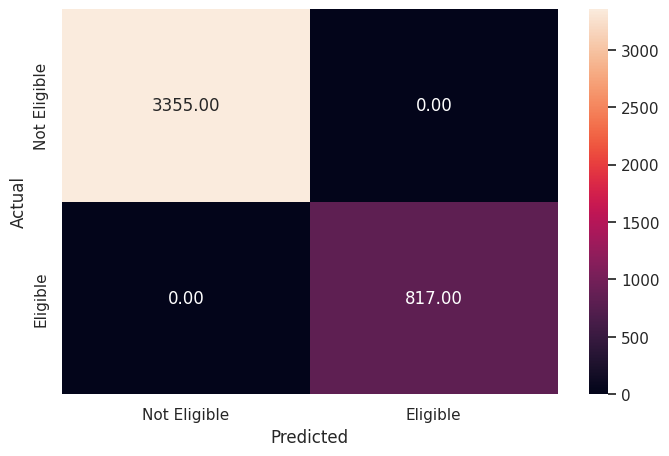

In [ ]:
#@title
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train4 =rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1416
           1       0.82      0.64      0.72       372

    accuracy                           0.90      1788
   macro avg       0.87      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



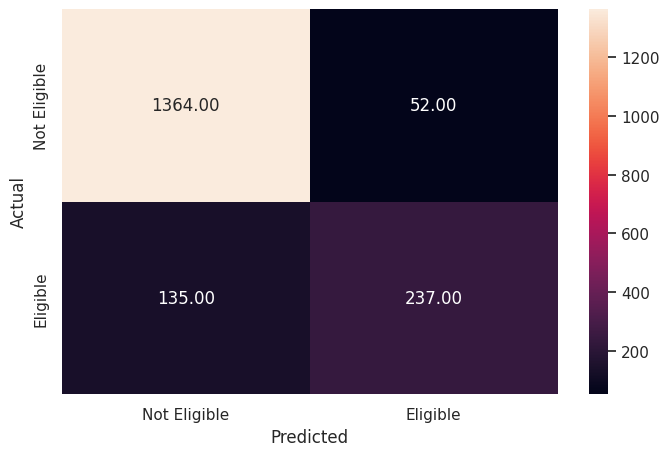

In [ ]:
#@title
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

Model is giving 100% score on all metrics, precision,recall,accuracy on the training set, which indicates it is performing very well on training set.

But on test set,we can see that class 0 has high precision and high recall, but class 1 has,less precision and even less recall, which suggest overfitting of the model on the test set.

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes?

When assigning class weights in a machine learning model, you typically want to assign higher weights to the minority class (the class with fewer instances) and lower weights to the majority class. This helps the model to pay more attention to the minority class during training and to better capture its patterns and characteristics.

For example, in a binary classification problem where class 0 is the majority class and class 1 is the minority class, you might assign a higher weight to class 1 and a lower weight to class 0. This imbalance in weights ensures that the model puts more emphasis on correctly classifying instances of the minority class, thereby improving its ability to detect rare events or patterns.

In summary, increasing the class weight for the minority class and decreasing it for the majority class is a common practice to address class imbalance and improve the model's performance on imbalanced datasets.

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune.

In [ ]:
#@title
# Choose the type of classifier.
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)



# Grid of parameters to choose from
# Remove _________ and complete the code

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_



# Fit the best algorithm to the data.
# Remove _________ and complete the code
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3355
           1       0.63      0.77      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.87      4172



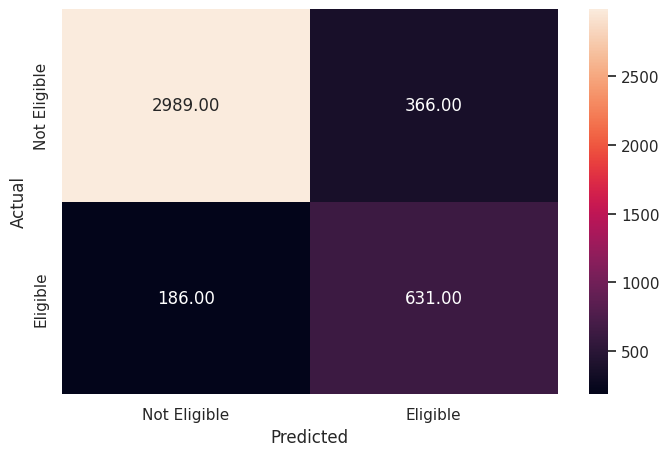

In [ ]:
#@title
# Checking performance on the training data
# Remove _________ and complete the code

y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1416
           1       0.65      0.72      0.68       372

    accuracy                           0.86      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.86      0.86      1788



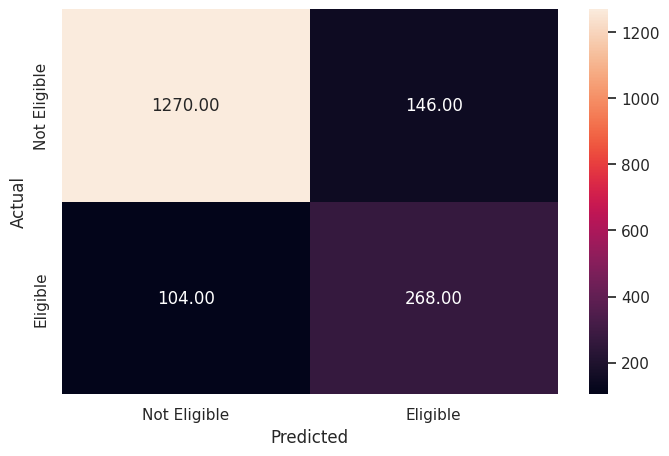

In [ ]:
#@title
# Checking performace on test dataset
# Remove _________ and complete the code

y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Insights: The model seems to be performing almost similarily for train and test datasets.
After tuning the random forest classifier, there is a increase in recall for class 1.**

#### Plot the Feature importance of the tuned Random Forest

In [ ]:
#@title
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.487456
DEBTINC                      0.241546
CLAGE                        0.074902
VALUE                        0.037402
LOAN                         0.032181
MORTDUE                      0.024672
YOJ                          0.024462
NINQ                         0.022667
CLNO                         0.020405
VALUE_missing_values_flag    0.009543
DEROG_missing_values_flag    0.007120
JOB_missing_values_flag      0.004585
JOB_ProfExe                  0.003317
JOB_Other                    0.002890
JOB_Office                   0.001861
REASON_HomeImp               0.001790
DELINQ_missing_values_flag   0.001131
NINQ_missing_values_flag     0.000674
MORTDUE_missing_values_flag  0.000615
YOJ_missing_values_flag      0.000468
CLNO_missing_values_flag     0.000231
REASON_missing_values_flag   0.000041
CLAGE_missing_values_flag    0.000039
DELINQ                       0.000000
DEROG                        0.000000
JOB_Sales   

The most important fetures after tuning the random forest classifier seem to be DEBTINC_Missing_Values_Flag,DEBTINC,followed by CLAGE,VALUE,LOAN,MORTDUE.

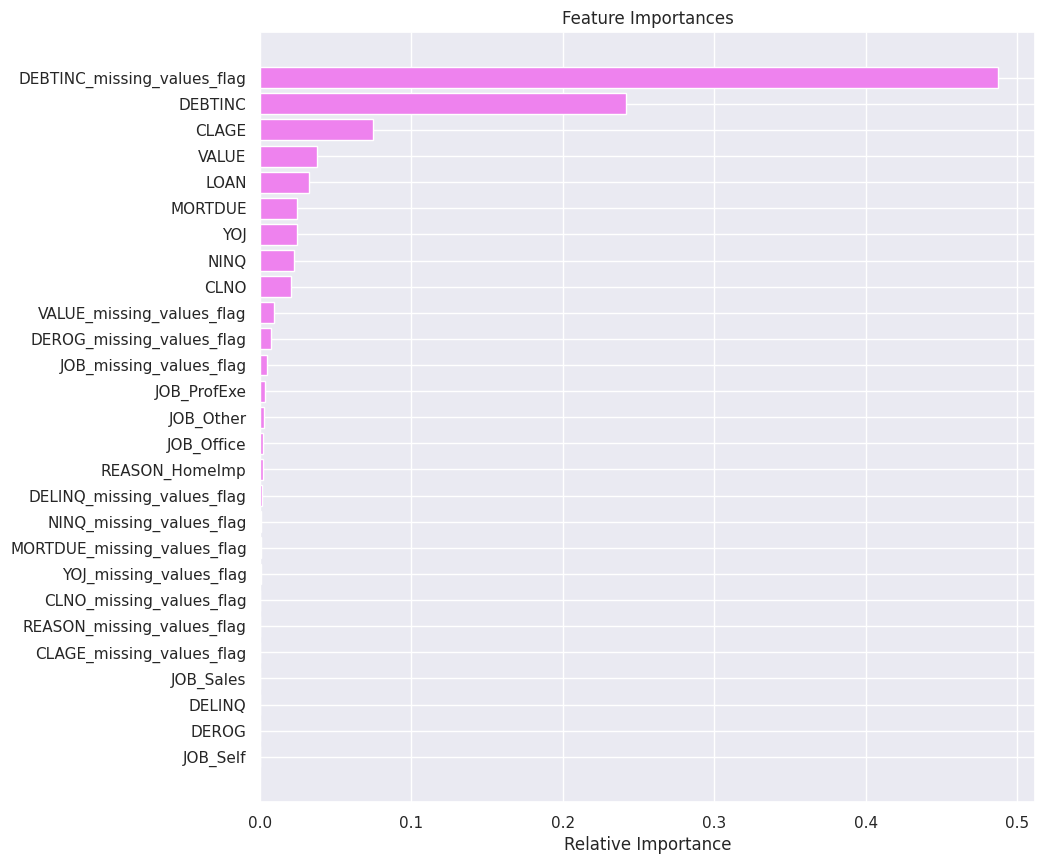

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet',align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement?

### **Comparing Model Performances**

In [ ]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [ ]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [ ]:
#@title
# Make the list of all the model names
# Remove _________ and complete the code

models = [lg,d_tree,d_tree_tuned,rf_estimator,rf_estimator_tuned]

# defining empty lists to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores


for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
#@title
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['lg','d_tree','d_tree_tuned','rf_estimator','rf_estimator_tuned'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0                  lg        0.805159       0.792785      0.023379   
1              d_tree        1.000000       0.864094      1.000000   
2        d_tree_tuned        0.852139       0.821309      0.888417   
3        rf_estimator        1.000000       0.920302      1.000000   
4  rf_estimator_tuned        0.880243       0.869128      0.801275   

   Test_Recall  Train_Precision  Test_Precision  
0     0.008065         0.687500        0.666667  
1     0.600806         1.000000        0.702830  
2     0.782258         0.582173        0.549575  
3     0.669355         1.000000        0.927374  
4     0.729839         0.662566        0.670370

**Insights:
Accuracy: Random Forest (rf_estimator) achieved the highest test accuracy (0.920), followed closely by its tuned version (0.869). Decision Tree (d_tree) also performed well in terms of test accuracy (0.864). Logistic Regression (lg) had the lowest test accuracy (0.793).

Precision: Random Forest (rf_estimator) achieved the highest test precision (0.927), closely followed by Decision Tree (d_tree) (0.703). Logistic Regression (lg) had the lowest precision for both train and test sets.

Recall: Logistic Regression (lg) had the lowest recall for both train and test sets.The tuned Decision Tree (d_tree_tuned) achieved a higher test recall (0.782) compared to the Random Forest tuned(rf_estimator_tuned) model's test recall (0.729).
This indicates that the tuned Decision Tree model performed better in terms of identifying true positive cases within the test dataset compared to the tuned  Random Forest model.

Overfitting: Decision Tree (d_tree) achieved perfect accuracy on the training set (1.000), indicating potential overfitting on the test set.


Considering all the performance metrics:

Accuracy: rf_estimator_tuned has a higher test accuracy (0.869) compared to d_tree_tuned (0.821), indicating that rf_estimator_tuned performs better overall in terms of correctly classifying instances.

Recall: d_tree_tuned has a slightly higher test recall (0.782) compared to rf_estimator_tuned (0.730), indicating that d_tree_tuned is better at identifying true positive cases within the test dataset.

Precision: rf_estimator_tuned has a higher test precision (0.670) compared to d_tree_tuned (0.550), indicating that rf_estimator_tuned makes fewer false positive predictions.

In summary,as maximizing recall is the primary concern while still considering other metrics, the tuned Decision Tree (d_tree_tuned) model may be preferred due to its higher recall. However, if a balance between recall and precision is desired, the tuned Random Forest (rf_estimator_tuned) model may be a better choice as it has a higher precision while still maintaining a reasonably high recall and accuracy.

So the tuned random forest model is the best choice here.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?